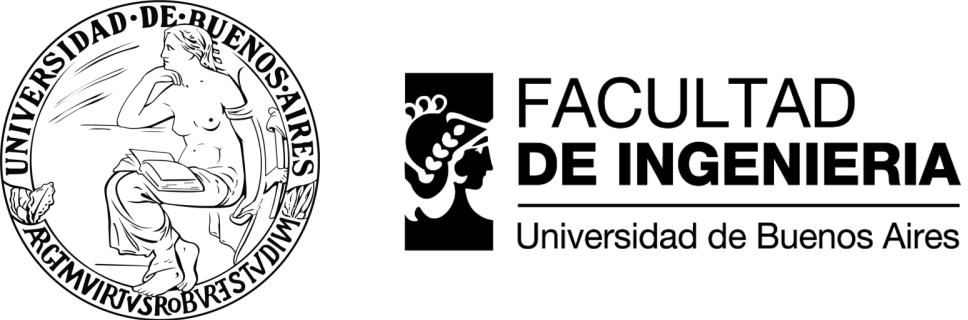

<h2><center>[75.12 - 95.04] Análisis Numérico</center></h2>
<h3><center>Trabajo Práctico 1 - 1er cuatrimestre 2023</center></h3>

---


<h1><center>Búsqueda de raíces</center></h1>



---
Autores:

*   **Dávila, Rebeca.**

Legajo 108167

<rdavila@fi.uba.ar>
*   **Ochoa, Amalia.**

Legajo 107129

<amochoa@fi.uba.ar>
* **Perico, Santiago**

Legajo 104460

<sperico@fi.uba.ar>


---
Lenguaje utilizado: Python

---


# Índice
1. [Objetivos](#objetivos)
2. [Introducción](#introduccion)
3. [Fuerza Bruta](#fuerzabruta)
  1. [Desarrollo de la experiencia](#desarrollofzabruta)
  2. [Análisis de resultados](#analisisfzabruta)
4. [Hallar π por dos caminos](#hallarpi)
  1. [Aproximación por método Newton-Raphson](#approxn-r)
  2. [Aproximación por serie de Leibniz](#approxleibniz)
  3. [Análisis de resultados](#analisispi)
    1. [Utilizando representación de punto flotante de 32 bits](#32bits)
    2. [Utilizando representación de punto flotante de 64 bits](#64bits)
    1. [Representación final de las respuestas obtenidas](#representacionfinal)
5. [Búsqueda de raíces](#busquedaraices)
  1. [Análisis para $f_1(x)$](#analisisf1)
    1. [Bisección](#biseccionf1)
    2. [Punto fijo](#pfijof1)
    3. [Secante](#secantef1)
    4. [Newton-Raphson](#nrf1)
    5. [Newton-Raphson modificado](#nrmodf1)
  2. [Análisis para $f_2(x)$](#analisisf2)
    1. [Bisección](#b iseccionf2)
    2. [Punto fijo](#pfijof2)
    3. [Secante](#secantef2)
    4. [Newton-Raphson](#nrf2)
    5. [Newton-Raphson modificado](#nrmodf2)
  3. [Análisis para $f_3(x)$](#analisisf3)
    1. [Bisección](#biseccionf3)
    2. [Punto fijo](#pfijof3)
    3. [Secante](#secantef3)
    4. [Newton-Raphson](#nrf3)
    5. [Newton-Raphson modificado](#nrmodf3)
  4. [Obtenención $X_{real}$](#xreal)
  5. [Análisias de convergencia](#analisis3)
    1. [Gráficos para $f_1(x)$](#graff1)
    2. [Gráficos para $f_2(x)$](#graff2)
    3. [Gráficos para $f_3(x)$](#graff3)
  5. [Análisias de resultados](#analisisres)
6. [Conclusiones](#conclusiones)




## Objetivos <a name="objetivos"></a>



---



En este trabajo se estudia la convergencia de diferentes métodos de búsqueda de raíces, comparándolo con la metodología por fuerza bruta. Para eso, se realiza a continuación:

*   El modelaje de la búsqueda de raíces por fuerza bruta con una simulación en Python.
*   La aproximación del número π con un algoritmo mediante dos métodos distintos, estudiando el límite de la herramienta
*La búsqueda de raíces para tres ecuaciones mediante diferentes métodos vistos en clase y su comparación con el valor real de la raíz, para el análisis de sus cotas de error


## Introducción<a name="introducion"></a>


---


&nbsp;&nbsp;&nbsp; Redactamos la realización de distintos modelajes de análisis numerico con el uso de python para determinar el nivel de precisión que tienen diferentes métodos, incluído el azar. Además ponemos a prueba la capacidad de la computadora para resolver estos problemas.

&nbsp;&nbsp;&nbsp; Esto se realiza para ver si hay una "mejor" forma o método para la búsqueda de raíces de distintos problemas. A continuación se deja la primera lína a ejecutar, que incluyen todos los scripts necesarios para la experiencia.

In [ ]:
import math as math
import matplotlib.pyplot as plt
import random
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import brentq
pd.options.display.float_format = '{:.5e}'.format

## Fuerza Bruta <a name= "fuerzabruta"></a>



---



&nbsp;&nbsp;&nbsp; Un programa de fuerza bruta se utiliza cuando no se tiene información adicional sobre la entrada que se desea encontrar, como por ejemplo una contraseña que fue creada aleatoriamente. En esta sección se buscará la clave de un código de un candado de tres dígitos mediante
la "prueba y error" con una simulación en python

 ### &nbsp;&nbsp;&nbsp;**Desarrollo de la experiencia** <a name= "desarrollofzabruta"></a>
&nbsp;&nbsp;&nbsp; Para la simulación del evento, primero se realiza la generación de la clave de 3 dígitos de forma aleatoria con la siguiente función:

In [ ]:
def generar_clave_al_al_azar():
    clave = random.randint(000, 999)
    return clave

A continuación se programa un algoritmo que sugerirá distintas claves en un rango de [0,999] e irá comparando con la clave del candado establecida de forma aleatoria

In [ ]:
def encontrar_clave_por_fuerza_bruta(clave):
    contador = 0
    "Al encontrar la clave informa el número de intentos hasta hallarla"
    while True:
        clave_sugerida = random.randint(000, 999)
        contador += 1
        if clave_sugerida == clave:
            return  contador

Con estas funciones, podemos programr la iteración del método, que corre hasta encontrar la clave del candado y registrar en que iteración se encontró la clave. Esto se realiza con el algoritmo del siguiente bloque.

In [ ]:
def realizar_experimento(cantidad_de_iteraciones):
    clave = generar_clave_al_al_azar()
    muestra_de_intentos = []
    for i in range(1, cantidad_de_iteraciones +1):

        numero_de_intentos = encontrar_clave_por_fuerza_bruta(clave)
        muestra_de_intentos.append(numero_de_intentos)
    return muestra_de_intentos

Finalmente, ejecutando el siguiente bloque, podemos realizar la simulación 100000 veces y con la cantidad de intentos registrados para cada simulación, graficar un histograma, para ver el comportamiento del método.



In [ ]:
muestra_de_intentos = realizar_experimento(100000)

muestra de intentos [317, 450, 1149, 5766, 467, 906, 2440, 303, 209, 1863, 2889, 418, 19, 860, 261, 1968, 853, 20, 925, 947, 152, 17, 95, 661, 1501, 151, 932, 25, 1314, 505, 462, 106, 1215, 1796, 842, 1045, 1443, 147, 1556, 1876, 310, 758, 125, 375, 2882, 1727, 660, 806, 745, 600, 1711, 331, 1380, 1056, 1070, 1070, 276, 656, 487, 147, 212, 888, 111, 1157, 671, 806, 723, 844, 447, 109, 1672, 2540, 1323, 206, 1521, 633, 459, 634, 210, 128, 953, 552, 2220, 107, 1729, 793, 1848, 586, 82, 3642, 692, 1140, 909, 973, 98, 2215, 550, 1096, 911, 933, 901, 738, 195, 442, 586, 368, 2449, 904, 7, 618, 1529, 2477, 353, 308, 672, 1192, 730, 197, 1074, 15, 4694, 1031, 1571, 1252, 122, 85, 1581, 370, 567, 909, 525, 148, 70, 446, 499, 973, 441, 2032, 333, 922, 201, 1090, 1152, 362, 394, 2133, 986, 336, 2722, 2475, 321, 793, 1894, 336, 831, 1504, 292, 1939, 781, 3676, 799, 3724, 3597, 1133, 123, 198, 255, 35, 1214, 3569, 1929, 1825, 285, 753, 349, 1450, 2729, 1983, 807, 2021, 449, 887, 1919, 1588, 82, 22

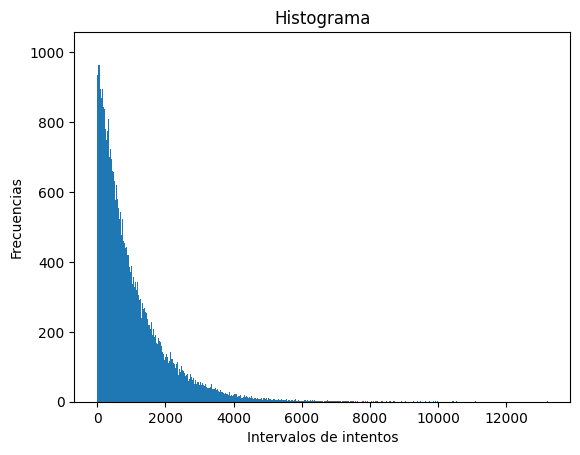

In [ ]:
print("muestra de intentos", muestra_de_intentos)
intervalos = list(range(0, max(muestra_de_intentos)+ 1 + 10, 10)) # los intervalos van de 10 en 10, y calculamos el maximo numero de intentos para incluirlo en los intervalos de intentos
# contamos las frecuencias de cada muestra en los intervalos, o sea calculamos las frecuencias de cada muestra puntual de intentos
frecuencias = []
for intervalo_fin in intervalos:
  frecuencia_de_muestra_de_intento = 0
  if intervalo_fin == 0:
    continue # porque sería un intervalo inválido

  for muestra_de_intento in muestra_de_intentos:
    if muestra_de_intento in range(intervalo_fin - 10,intervalo_fin):
      frecuencia_de_muestra_de_intento += 1
  frecuencias.append(frecuencia_de_muestra_de_intento)

print("frecuencias",frecuencias)
print("intervalos",intervalos)
plt.bar(intervalos[:-1], frecuencias, width=20)
plt.xlabel('Intervalos de intentos')
plt.ylabel('Frecuencias')
plt.title('Histograma')
plt.show()


###&nbsp;&nbsp;&nbsp;**Análisis de resultados** <a name="analisisfzabruta"></a>

&nbsp;&nbsp;&nbsp; Podemos ver que el método puede probar ser de útilidad en el sentido que resuelve lo pedido. Es decir, eventualmente se logra encontrar la clave del candado pero puede tomar numerosas iteraciones. El método funciona pero no es el más eficiente por lo que se podría reservar para situaciones donde el rango de valores posibles es acotado.

&nbsp;&nbsp;&nbsp; En nuestro caso, sabemos que la posible solución pertenece a los números naturales entre [0;999], pero en una función donde la solución estuviera en un intervalo de los Reales continuo, no habría forma de determinar cual de sus infinitos números podría ser la raíz.

&nbsp;&nbsp;&nbsp; ¿Sería correcto hablar de convergencia? No es correcto hablar de convergencia ya que los números son generados de manera aleatoria sin seguir un patrón específico. El programa se
basa en exhaustividad.

## Hallar π por dos caminos <a name= "hallarpi"></a>



---



&nbsp;&nbsp;&nbsp; En esta sección se aproximará el número irracional π analizando la función sin(x) con el método de Newton-Raphson y el desarrollo en serie de Leibniz. En el bloque siguiente se definen la f(x) a analizar



In [ ]:
def f(x):
  return math.sin(x)

def fprima(x):
  return math.cos(x)


 ### &nbsp;&nbsp;&nbsp;**Aproximación por método Newton-Raphson** <a name= "approxn-r"></a>

&nbsp;&nbsp;&nbsp;
Para desarrollar lo pedido en el inciso, se programó el algoritmo de Newton-Rapshson en función de x, de modo que se itere hasta alcanzar el límite de la computadora. Entonces se utilizó como criterio de paro el valor teórico de tolerancia 10^-15 que representa el orden del valor más pequeño que puede representar la computadora si se utiliza punto flotante de 64 bits, y 10^-7 si se emplea representación de punto flotante de 32 bits.
Para lograr el propósito se tuvo en cuenta que se debe pasar por parámetro una raíz que se encuentre "cerca" de la raíz a ser hallada, en este caso π, se eligió 3.2




La semilla elegida además de ser cercana, debe cumplir con la condición de que la recta tangente en f(x0) interseque al eje x dentro de un intervalo definido, en donde la suceción de derivadas convergen a la solución.

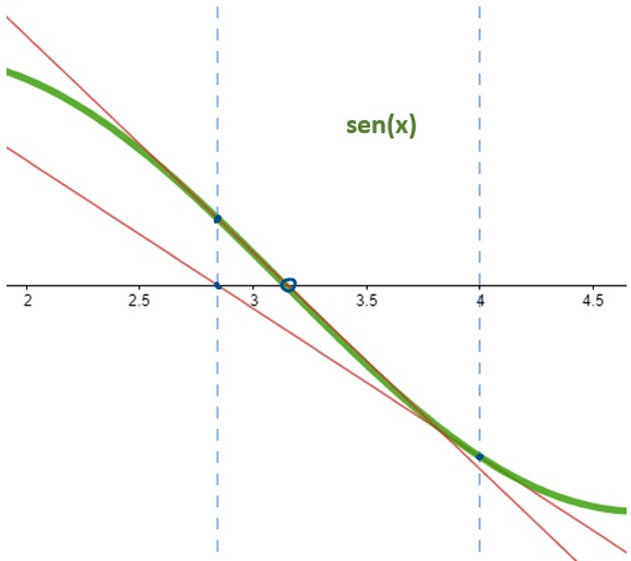

Al analizar la gráfica de la función vemos que la sucesión de derivadas dentro del intervalo (π;2π) convergen a la solución. En particular la semilla elegida x=3,2 se encuentra dentro del intervalo.
En caso de analizar por medio de una computadora, varias iteraciones por medio del método de la bisección llevan a la semilla de arranque al intervalo propuesto.


In [ ]:
CRITERIO_DE_PARO_64_BITS = 10**-15
CRITERIO_DE_PARO_32_BITS = 10**-7

### &nbsp;&nbsp;&nbsp;**Aproximación por serie de Leibniz** <a name= "approxleibniz"></a>

&nbsp;&nbsp;&nbsp; Luego, en vez de tomar un modelo de búsqueda de raíces, se aproxima π utilizando la serie de Leibniz. A continuación, se programó el desarrollo en serie de π en función de n, siendo n la cantidad de términos que se están sumando.

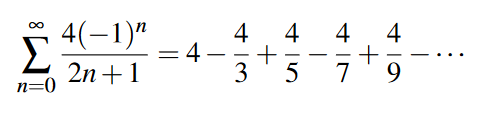

In [ ]:

def serie_de_leibniz_64_bits(n):
  "Devuelve el valor aproximado de pi y la diferencia entre iteraciones sucesivas"
  pi_anterior = 0
  for i in range(n+1):
    pi_nuevo = (pi_anterior + 4*((-1)**i)/(2*i +1))
    error_pi = abs(pi_nuevo - pi_anterior)
    pi_anterior = pi_nuevo
  return pi_nuevo, error_pi


Tomando n = 100000 se obtiene el siguiente valor de π

In [ ]:
serie_de_leibniz_64_bits(100000)

(3.1416026534897203, 1.999990000056684e-05)

 ### &nbsp;&nbsp;&nbsp;**Análisis de resultados** <a name= "analisispi"></a>

 #### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Utilizando representación de punto flotante de 32 bits** <a name= "32bits"></a>

&nbsp;&nbsp;&nbsp; Como se utilizó python, en este lenguaje todo los números decimales se consideran por defecto como punto flotante de 64 bits. Para poder almacenar los números en representación de 32 bits, se utilizó la bibilioteca Numpy, que proporciona el tipo de datos float32. Por lo tanto se modificó la función de newton rhapson y la serie de leibniz especificando que los
números se almacenaran de esta manera. Los resultados obtenidos son los siguientes:

In [ ]:

def newtonraphson_hasta_alcanzar_limite_de_la_computadora_32_bits(semilla, numero_maximo_de_iteraciones):
  "Devuelve la aproximacion y la diferencia entre iteraciones sucesivas"
  contador = 1
  while True:
    f_en_semilla = np.float32(f(semilla))
    f_prima_en_semilla = np.float32(fprima(semilla))
    if f_prima_en_semilla == 0:   # chequeo que la fprima no se anule en la aproximación de la raíz
      return semilla
    nueva_aprox_raiz = np.float32(semilla - (f_en_semilla/f_prima_en_semilla))
    diferencia_iteraciones_sucesivas = np.float32(abs(nueva_aprox_raiz - semilla))
    if diferencia_iteraciones_sucesivas < CRITERIO_DE_PARO_32_BITS or contador >= numero_maximo_de_iteraciones:
      return nueva_aprox_raiz
    semilla = nueva_aprox_raiz
    contador += 1

In [ ]:
semilla = np.float32(3.2)
newtonraphson_hasta_alcanzar_limite_de_la_computadora_32_bits(semilla, 1000)


3.1415927

In [ ]:
def serie_de_leibniz_32_bits(n):
  "Devuelve el valor aproximado de pi y la diferencia entre iteraciones sucesivas"
  pi_anterior = 0
  for i in range(n+1):
    pi_nuevo = np.float32(pi_anterior + 4*((-1)**i)/(2*i +1))
    diferencia_pi = abs(pi_nuevo - pi_anterior)
    pi_anterior = pi_nuevo
  return pi_nuevo, diferencia_pi

In [ ]:
serie_de_leibniz_32_bits(10)



(3.232316, 0.19047618)

In [ ]:
serie_de_leibniz_32_bits(100)

(3.1514933, 0.01990056)

In [ ]:
serie_de_leibniz_32_bits(1000)


(3.1425917, 0.0019989014)

In [ ]:
serie_de_leibniz_32_bits(10000)


(3.1416984, 0.00020003319)

In [ ]:

serie_de_leibniz_32_bits(100000)

(3.1416056, 2.002716e-05)

Para una mejor visualización de los datos se propone la siguiente tabla con los criterios de representación de la cátedra:

|             |             | Raíces      |             |             |             |
|-------------|-------------|-------------|-------------|-------------|-------------|
| N-R         | N = 10      | N = 100     | N = 1000    | N = 10000   | N = 100000  |
| 0.31415e+01 | 0.32323e+01 | 0.31514e+01 | 0.31425e+01 | 0.31416e+01 | 0.31416e+01 |

 #### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Utilizando representación de punto flotante de 64 bits** <a name= "64bits"></a>

&nbsp;&nbsp;&nbsp; Para resolver este inciso se ejecutaron los programas solicitados, teniendo en cuenta que en Python se almacenan los números en 64 bits por defecto, los resultados fueron los siguientes.


In [ ]:

def newtonraphson_hasta_alcanzar_limite_de_la_computadora_64_bits(semilla, numero_maximo_de_iteraciones):
  "Devuelve la aproximacion y la diferencia entre iteraciones sucesivas"
  contador = 1
  while True:
    f_en_semilla = f(semilla)
    f_prima_en_semilla = fprima(semilla)
    if f_prima_en_semilla == 0:   # chequeo que la fprima no se anule en la aproximación de la raíz
      return semilla
    nueva_aprox_raiz = semilla - (f_en_semilla/f_prima_en_semilla)
    diferencia_iteraciones_sucesivas = abs(nueva_aprox_raiz - semilla)
    if diferencia_iteraciones_sucesivas < CRITERIO_DE_PARO_64_BITS or contador >= numero_maximo_de_iteraciones:
      return nueva_aprox_raiz
    semilla = nueva_aprox_raiz
    contador += 1

In [ ]:
newtonraphson_hasta_alcanzar_limite_de_la_computadora_64_bits(3.2, 20) # El numero máximo de iteraciones se eligió teniendo en cuenta el dato experimental de que convergue para menos 5 iteraciones.

3.141592653589793

In [ ]:
serie_de_leibniz_64_bits(10)

(3.232315809405594, 0.1904761904761907)

In [ ]:
serie_de_leibniz_64_bits(100)

(3.1514934010709914, 0.01990049751243772)

In [ ]:
serie_de_leibniz_64_bits(1000)

(3.1425916543395442, 0.001999000499750103)

In [ ]:
serie_de_leibniz_64_bits(10000)

(3.1416926435905346, 0.0001999900005000832)

In [ ]:

serie_de_leibniz_64_bits(100000)

(3.1416026534897203, 1.999990000056684e-05)

Para una mejor visualización de los datos se propone la siguiente tabla con los criterios de representación de la cátedra:

|             |             | Raíces      |             |             |             |
|-------------|-------------|-------------|-------------|-------------|-------------|
| N-R         | N = 10      | N = 100     | N = 1000    | N = 10000   | N = 100000  |
| 0.31415e+01 | 0.32323e+01 | 0.31514e+01 | 0.31425e+01 | 0.31416e+01 | 0.31416e+01 |[texto del vínculo](https://)


 #### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Representación final de las respuestas obtenidas** <a name= "representacionfinal"></a>

&nbsp;&nbsp;&nbsp; Viendo las conveciones vistas en clase, podemos escribir los esultados obtenidos de la siguiente manera:

<u>Ejecutando con punto flotnte de represenación de 32 bits</u>:

*   Newton-Raphson:    π =  $3.1415927 \pm 10^{-7} $
*   Leibniz:   π = $3.14161 \pm  0.2*10^{-4}$


<u>Ejecutado con punto flotante de representación de 64 bits</u>:

*   Newton-Raphson: π = $3.141592653589792 \pm 10^{-15}$)
*   Leibniz:   π = $3.14160 \pm 0.2*10^{-4}$

&nbsp;&nbsp;&nbsp; Podemos iterpretar que la computadora toma a π como una constante, la exactitud de su valor dependen de la precisión aritmética de punto flotante utilizada y la cantidad de dígitos decimales que se utilizan
para representarlo. Por lo tanto, si se requiere una mayor precisión en los cálculos, es posible que sea necesario utilizar algoritmos especiales n o utilizar bibliotecas matemáticas que
proporcionen una mayor precisión.

## Búsqueda de raíces <a name= "busquedaraices"></a>



---



&nbsp;&nbsp;&nbsp; En esta seccion se van a desarrollar los siguientes métodos de búsqueda de raíces:  Bisección, Punto Fijo, Secante, Newton-Raphson y Newton-Raphson modificado. Esto se va a realizar sobre las siguientes 3 ecuaciones con raíz única en el intervalo [0;3].

Las funciones son:

$f_{1}(x) = x^{3} - 19$

$f_{2}(x) = x^{5} - 7.3x^{4} + 2.24x^{3} + 30.106x^{2} - 42.1x + 15.94$

$f_{3}(x) = (x - 0.9)e^{-4(x-0.9)^2}$







Escribimos el código de todos los métodos vistos en clase:

In [ ]:
def biseccion(a, b, tolerancia, f):
  datos = {'num_de_iter':[0], 'raiz':[0], 'error': ['-']}
  fa = f(a)
  i = 0

  cota_de_iteracion = (np.log(b-a)- np.log(tolerancia)) / np.log(2)
  tolerancia_error = True

  while i < cota_de_iteracion and tolerancia_error :
    i += 1
    p = a + (b-a)/2
    fp = f(p)

    # calculo el error
    error = abs(p- datos['raiz'][-1])

    # agrego los datos
    datos['num_de_iter'].append(i)
    datos['raiz'].append(p)
    datos['error'].append(error)

    if error < tolerancia :
      tolerancia_error = False
    if fa*fp > 0:
      a = p
      fa = fp
    else:
      b = p
  return datos

def punto_fijo(semilla, g, tolerancia):

  #primero debemos definir g, en este caso la defino como g = x - f, y
  #esta g debe cumplir que g sea continua en el intervalo, y g(x) pertenezca al intervalo para cada x en el intervaloy el |g´(x)| <= 1 para cada x del intervalo, esto garantiza convergencia.
  datos = {'num_de_iter':[0], 'raiz':[semilla], 'error': ['-']}
  p_n = semilla
  i = 0
  tolerancia_error = True

  #considero que, si despues de 1000 iteraciones el método no converge, es porque hubo algun error en la funcion o la semilla y no va a converger
  while tolerancia_error and i < 1000:

    i += 1
    p_n_mas_uno = g(p_n)

    datos['num_de_iter'].append(i)
    datos['raiz'].append(p_n_mas_uno)
    error = abs(p_n - p_n_mas_uno)
    datos['error'].append(error)

    if (abs(error < tolerancia)):
      tolerancia_error = False
    p_n = p_n_mas_uno
  return datos


def metodo_de_la_secante(p0, p1, tolerancia,f):
  datos = {'num_de_iter':[0], 'raiz':[0], 'error': ['-']}
  q0 = f(p0)
  q1 = f(p1)
  i = 0

  tolerancia_error = True
  #considero que, si despues de 1000 iteraciones el método no converge, es porque hubo algun error en la funcion o la semilla y no va a converger
  while tolerancia_error and i < 1000 :
    i += 1
    p = p1 - q1*(p1-p0)/(q1 - q0)
    datos['num_de_iter'].append(i)
    datos['raiz'].append(p)
    error = abs(p - p1)
    datos['error'].append(error)
    if error < tolerancia:
      tolerancia_error = False
    p0 = p1
    q0 = q1
    p1 = p
    q1 = f(p)
  return datos

def newtonraphson(p0, tolerancia, f, fprima):
  datos = {'num_de_iter':[0], 'raiz':[0], 'error': ['-']}
  i = 0
  "ACLARACIÓN: para que el método converga la semilla tiene que estar muy cerca de la raíz"

  tolerancia_error = True
 #considero que, si despues de 1000 iteraciones el método no converge, es porque hubo algun error en la funcion o la semilla y no va a converger
  while tolerancia_error and i < 1000:

    i += 1
    if fprima(p0) == 0:
     print("El método no puede continuarse dado que fprima se anula en la aproximación de la raíz")
     print(p0)
    p = p0 - (f(p0)/fprima(p0))
    datos['num_de_iter'].append(i)
    datos['raiz'].append(p)
    error = abs(p - p0)
    datos['error'].append(error)
    if error < tolerancia:
      tolerancia_error = False
    p0 = p
  return datos

def newtonraphson_modificado(p0, tolerancia, f, fprima, fprima_prima):
  datos = {'num_de_iter':[0], 'raiz':[0], 'error': ['-']}
  i = 0
  tolerancia_error = True

  #considero que, si despues de 1000 iteraciones el método no converge, es porque hubo algun error en la funcion o la semilla y no va a converger
  while tolerancia_error and i < 1000:
    i+= 1
    p = p0 - (f(p0)*fprima(p0)/((fprima(p0)**2) -f(p0)*fprima_prima(p0)))

    datos['num_de_iter'].append(i)
    datos['raiz'].append(p)
    error = abs(p - p0)
    datos['error'].append(error)
    if error < tolerancia:
      tolerancia_error = False
    p0 = p
  return datos

&nbsp;&nbsp;&nbsp; En el bloque siguiente se definen las funciones $f_{1}, f_{2}, f_{3}$ y sus respectivas derivadas

In [ ]:
def f1(x):
  return x**3 -19

def f1_prima(x):
  return 3*x**2

def f1_prima_prima(x):
  return 6*x

def f2(x):
  return (x)**5 - (7.3)*x**4 + (2.24)*x**3 + (30.106)*x**2 - (42.1)*x + 15.94

def f2_prima(x):
  return 5*x**4 -29.2*x**3 +6.72*x**2 + 60.212*x -42.1

def f2_prima_prima(x):
  return 20*x**3 -87.6*x**2 +13.44*x + 60.212

def f3(x):
  return (x - 0.9)*math.e**(-4*(x-0.9)**2)

def f3_prima(x):
  return ((-8*x + 7.2)*(x-0.9) + 1 )*math.exp(-4*(x-0.9)**2)

def f3_prima_prima(x):
  return 64*(-0.3815 + 2.055*x -2.7*x**2 + x**3)*math.exp(-4*(x-0.9)**2)


&nbsp;&nbsp;&nbsp; En el siguiente bloque se programa la función graficadora para ver el comportamimento de las funciones a analizar.

In [ ]:
def graficar_funcion(f, nombre):
  x= np.linspace(0, 3, 200)
  y = f(x)
  plt.plot(x,y)
  plt.xlabel('eje X')
  plt.ylabel('eje Y')
  plt.title(nombre)
  plt.grid()
  plt.tight_layout()
  plt.show()

&nbsp;&nbsp;&nbsp; Ahora buscamos la raíz para cada uno de los métodos, con las dos tolerancias especificadas. En este caso para mostrar la tabla de iteraciones elegimos usar la biblioteca pandas. En el código, llamamos

```
# metodo_1 = metodo( )
```

a la función metodo ejecutado con una tolerancia de $10^{-5}$, luego llamamos

```
#metodo_2 = metodo ( )
```
a la función método ejecutado con una toleranciade $10^{-13}$.




## Análisis de $f_1(x)$ <a name= "analisisf1"></a>

&nbsp;&nbsp;&nbsp; Comenzamos el análisis graficando $f_1(x)$ para elegir una semilla adecuada

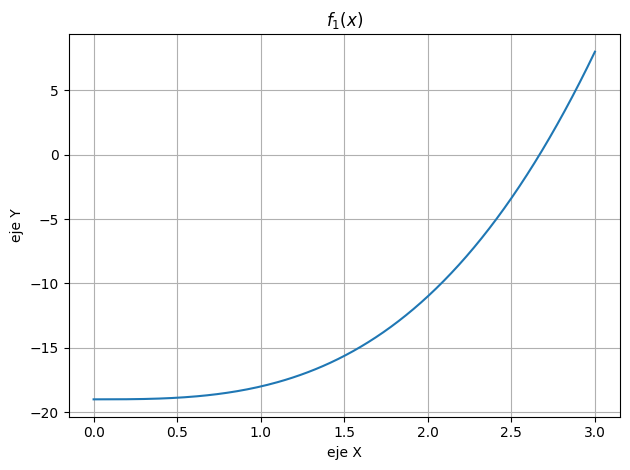

In [ ]:
graficar_funcion(f1, "$f_1(x)$") #se observa que la raíz está aproximadamente x = 2.66

### Bisección <a name= "biseccionf1"></a>


Ejecutamos la función bisección para el intervalo [0,3] y cargamos en la tabla de abajo los valores de error en las iteraciones.

In [ ]:
biseccion_1 = biseccion(0, 3, 10**-5, f1) #con una tolerancia de 10**-5

In [ ]:
tabla_datos_biseccion_1 = pd.DataFrame(biseccion_1)
tabla_datos_biseccion_1 = tabla_datos_biseccion_1.drop(0)
tabla_datos_biseccion_1

NameError: ignored

Ejecutamos la función bisección para el intervalo [0,3] y cargamos en la tabla de abajo los valores de error en las iteraciones para la siguiente tolerancia.

In [ ]:
biseccion_2 = biseccion(0, 3, 10**-13, f1) #con una tolerancia de 10**-13
tabla_datos_biseccion_2 = pd.DataFrame(biseccion_2)
tabla_datos_biseccion_2 = tabla_datos_biseccion_2.drop(0)
tabla_datos_biseccion_2



,num_de_iter,raiz,error
1,1,1.50000e+00,1.50000e+00
2,2,2.25000e+00,7.50000e-01
3,3,2.62500e+00,3.75000e-01
4,4,2.81250e+00,1.87500e-01
5,5,2.71875e+00,9.37500e-02
6,6,2.67188e+00,4.68750e-02
7,7,2.64844e+00,2.34375e-02
8,8,2.66016e+00,1.17188e-02
9,9,2.66602e+00,5.85938e-03
10,10,2.66895e+00,2.92969e-03


### Punto fijo <a name= "pfijof1"></a>


&nbsp;&nbsp;&nbsp; Ahora para usar el método del punto fijo, se debe definir una función $g_1(x)$, que cumpla con las condiciones del teorema del punto fijo que establece que:


*   $g_1$ sea continua en el intervalo [0,3] tal que $g(x_o)$ pertenezca a [0,3] para todas las $x_o$  en [0,3]. (existencia)


*   Además que existe $g'_1$ en (0,3) y que existe una constante $0 < k < 1$ con $|g'(x)| <= k$. (unicidad)

&nbsp;&nbsp;&nbsp; Estas dos condiciones aseguran la convergencia al único punto fijo en el intervalo. Entonces, si $x$ es punto fijo de $g_1(x) \Rightarrow x-g_1(x) = f_1(x)$ es raíz de $f_1(x)$

Se procede a igualar $f_1(x) =0$ para poder despejar $x = g_1(x)$.

En este caso nos queda la relación $x^3=19$, se propone aplicar raíz cúbica a ambos lados de la igualdad. Luego como solo vamos a estar evaluando en valores de $x>0$, despejamos el módulo: $x =19^{\frac 13}$. Lo podemos reescribir como:


$3x - 2x = 19^{\frac 13} ⇒ x = \frac{ 19^{\frac 13} +2x}{3} $

$\Rightarrow g_1(x) =\frac{19^{\frac 13} +2x}{3}$

*  Si usamos *Geogebra* para graficar $g_1(x)$ y $g'_1(x)$, vemos graficamente que $g_1(x)$ "entra por izquierda y sale por derecha" del cuadrado de vértices (0,0) , (0,3), (3,3) y (3,0) por lo que **se cumple la condición de existencia** ( $ ∃ \ g_1(x_o) ∈ [0,3] \ ∀ \ x_o ∈[0,3]$ )

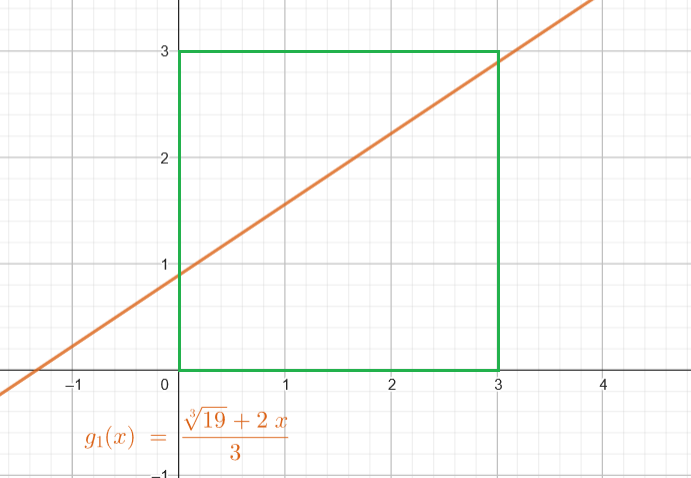

*  Viendo el gráfico de $g_1'(x)$, se observa que $|g'_1(x)| < 1 \ ∀ \ x ∈ [0,3]$, con lo que también **se verifica la condición de unicidad**. De hecho, como además se cumple que $0< g_1'(x) < 1$, podemos afirmar que el método tendrá convergencia monótona

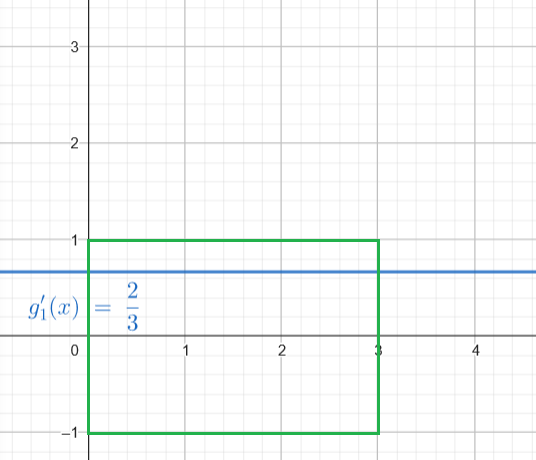

Luego, se puede afirmar que $g_1(x)$ tiene un único punto fijo en el intervalo [0,3] y la usaremos para hallar la raíz de $f_1(x)$ con el método de punto fijo. Viendo el gráfico, se propone usar la semilla $x_0=2$

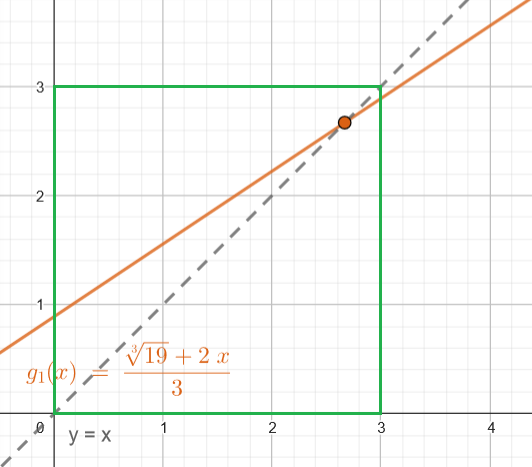

In [ ]:
def g1(x):
  return (19**(1/3)+ 2*x)/3

y escribimos las tablas para las tolerancias respectivas

---



In [ ]:
punto_fijo_1 = punto_fijo(2,  g1, 10**-5)#Punto Fijo 10**-5
tabla_datos_punto_fijo_1 = pd.DataFrame(punto_fijo_1)
tabla_datos_punto_fijo_1 = tabla_datos_punto_fijo_1.drop(0)
tabla_datos_punto_fijo_1


,num_de_iter,raiz,error
1,1,2.22280e+00,2.22801e-01
2,2,2.37133e+00,1.48534e-01
3,3,2.47036e+00,9.90225e-02
4,4,2.53637e+00,6.60150e-02
5,5,2.58038e+00,4.40100e-02
6,6,2.60972e+00,2.93400e-02
7,7,2.62928e+00,1.95600e-02
8,8,2.64232e+00,1.30400e-02
9,9,2.65101e+00,8.69333e-03
10,10,2.65681e+00,5.79555e-03


In [ ]:
punto_fijo_2 = punto_fijo(1.5,  g1, 10**-13)#Punto Fijo 10**-13
tabla_datos_punto_fijo_2 = pd.DataFrame(punto_fijo_2)
tabla_datos_punto_fijo_2 = tabla_datos_punto_fijo_2.drop(0)
tabla_datos_punto_fijo_2

,num_de_iter,raiz,error
1,1,1.88947e+00,3.89467e-01
2,2,2.14911e+00,2.59645e-01
3,3,2.32221e+00,1.73097e-01
4,4,2.43761e+00,1.15398e-01
5,5,2.51454e+00,7.69318e-02
...,...,...,...
69,69,2.66840e+00,4.13447e-13
70,70,2.66840e+00,2.75335e-13
71,71,2.66840e+00,1.83409e-13
72,72,2.66840e+00,1.22569e-13


### Secante <a name= "secantef1"></a>

&nbsp;&nbsp;&nbsp; Para el método secante, solo se ejecuta la fucion definida para las tolerancias especificadas. Los resultados son los siguientes:

In [ ]:
secante_1 = metodo_de_la_secante(0, 3, 10**-5, f1)
tabla_datos_secante_1 = pd.DataFrame(secante_1)
tabla_datos_secante_1 = tabla_datos_secante_1.drop(0)
tabla_datos_secante_1

,num_de_iter,raiz,error
1,1,2.11111e+00,8.88889e-01
2,2,2.59576e+00,4.84647e-01
3,3,2.68631e+00,9.05498e-02
4,4,2.66791e+00,1.84002e-02
5,5,2.66840e+00,4.90871e-04
6,6,2.66840e+00,3.30233e-06


In [ ]:
secante_2 = metodo_de_la_secante(0, 3, 10**-13, f1)
tabla_datos_secante_2 = pd.DataFrame(secante_2)
tabla_datos_secante_2 = tabla_datos_secante_2.drop(0)
tabla_datos_secante_2

,num_de_iter,raiz,error
1,1,2.11111e+00,8.88889e-01
2,2,2.59576e+00,4.84647e-01
3,3,2.68631e+00,9.05498e-02
4,4,2.66791e+00,1.84002e-02
5,5,2.66840e+00,4.90871e-04
6,6,2.66840e+00,3.30233e-06
7,7,2.66840e+00,6.11537e-10
8,8,2.66840e+00,4.44089e-16


### Newton-Raphson <a name= "nrf1"></a>

&nbsp;&nbsp;&nbsp; Mediante el uso de *Geogebra*, podemos graficar la función y su recta tangente. Luego, viendo el comportamiento de la derivada en distintos puntos proponemos la semilla $x_0 = 0,5$. Analizando la gráfica,  vemos que la derivada no se anula, y la sucesión de derivadas converge a la solución. En caso de que la semilla sea menor igual 0, la función divergería. El intervalo a considerar puede ser [0.5; 3].

&nbsp;&nbsp;&nbsp; Al igual que el método secante, se ejecuta el código para las tolerancias especificadas y se registran las cotas de error

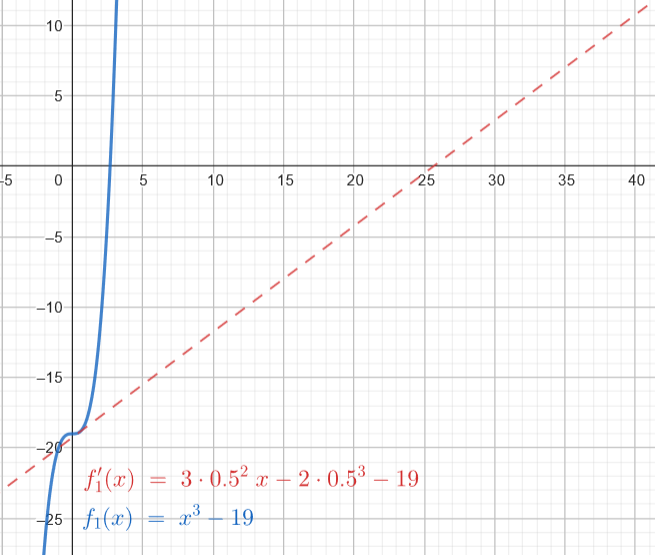

In [ ]:
newtonr_1 = newtonraphson(0.5, 10**-5, f1, f1_prima)
tabla_datos_newtonr = pd.DataFrame(newtonr_1)
tabla_datos_newtonr = tabla_datos_newtonr.drop(0)
tabla_datos_newtonr

,num_de_iter,raiz,error
1,1,2.56667e+01,2.51667e+01
2,2,1.71207e+01,8.54594e+00
3,3,1.14354e+01,5.68530e+00
4,4,7.67205e+00,3.76338e+00
5,5,5.22230e+00,2.44975e+00
6,6,3.71376e+00,1.50854e+00
7,7,2.93504e+00,7.78715e-01
8,8,2.69189e+00,2.43150e-01
9,9,2.66861e+00,2.32855e-02
10,10,2.66840e+00,2.04365e-04


In [ ]:
newtonr_2 = newtonraphson(0.5, 10**-13, f1, f1_prima)
tabla_datos_newtonr_2 = pd.DataFrame(newtonr_2)
tabla_datos_newtonr_2 = tabla_datos_newtonr_2.drop(0)
tabla_datos_newtonr_2.loc[12, 'error'] = 1e-15 #mofico ya que la computadora muestra error 0
tabla_datos_newtonr_2

,num_de_iter,raiz,error
1,1,2.56667e+01,2.51667e+01
2,2,1.71207e+01,8.54594e+00
3,3,1.14354e+01,5.68530e+00
4,4,7.67205e+00,3.76338e+00
5,5,5.22230e+00,2.44975e+00
6,6,3.71376e+00,1.50854e+00
7,7,2.93504e+00,7.78715e-01
8,8,2.69189e+00,2.43150e-01
9,9,2.66861e+00,2.32855e-02
10,10,2.66840e+00,2.04365e-04


### Newton-Raphson modificado <a name= "nrmodf1"></a>

&nbsp;&nbsp;&nbsp; Al igual que el método anterior, se ejecuta el código para las tolerancias especificadas y se registran las cotas de error

In [ ]:
newtonrm_1 = newtonraphson_modificado(0.5, 10**-5, f1, f1_prima, f1_prima_prima)
tabla_datos_newtonrm_1 = pd.DataFrame(newtonrm_1)
tabla_datos_newtonrm_1 = tabla_datos_newtonrm_1.drop(0)
tabla_datos_newtonrm_1

NameError: ignored

In [ ]:
newtonrm_2 = newtonraphson_modificado(0.5, 10**-13, f1, f1_prima, f1_prima_prima)
tabla_datos_newtonrm_2 = pd.DataFrame(newtonrm_2)
tabla_datos_newtonrm_2 = tabla_datos_newtonrm_2.drop(0)
tabla_datos_newtonrm_2.loc[10, 'error'] = 1e-15 #mofico ya que la computadora muestra error 0
tabla_datos_newtonrm_2

## Análisis de $f_2(x)$ <a name= "analisisf2"></a>

&nbsp;&nbsp;&nbsp; Comenzamos el análisis graficando $f_2(x)$ para elegir una semilla adecuada

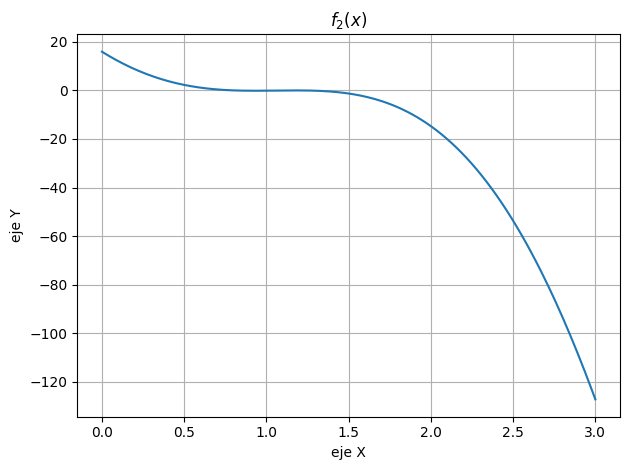

In [ ]:
graficar_funcion(f2, "$f_2(x)$") #se observa que la raíz está apro

### Bisección <a name= "biseccionf2"></a>

Ejecutamos la función bisección para el intervalo [0,3] y cargamos en la tabla de abajo los valores de error en las iteraciones.

In [ ]:
biseccion_1_f2 = biseccion(0, 3, 10**-5, f2) #con una tolerancia de 10**-5

In [ ]:
tabla_datos_biseccion_1_f2 = pd.DataFrame(biseccion_1_f2)
tabla_datos_biseccion_1_f2 = tabla_datos_biseccion_1_f2.drop(0)
tabla_datos_biseccion_1_f2


,num_de_iter,raiz,error
1,1,1.50000e+00,1.50000e+00
2,2,7.50000e-01,7.50000e-01
3,3,1.12500e+00,3.75000e-01
4,4,9.37500e-01,1.87500e-01
5,5,8.43750e-01,9.37500e-02
6,6,7.96875e-01,4.68750e-02
7,7,8.20312e-01,2.34375e-02
8,8,8.08594e-01,1.17188e-02
9,9,8.02734e-01,5.85938e-03
10,10,8.05664e-01,2.92969e-03


In [ ]:
biseccion_2_f2 = biseccion(0, 3, 10**-13, f2) #con una tolerancia de 10**-13

In [ ]:
tabla_datos_biseccion_2_f2 = pd.DataFrame(biseccion_2_f2)
tabla_datos_biseccion_2_f2 = tabla_datos_biseccion_2_f2.drop(0)
tabla_datos_biseccion_2_f2

,num_de_iter,raiz,error
1,1,1.50000e+00,1.50000e+00
2,2,7.50000e-01,7.50000e-01
3,3,1.12500e+00,3.75000e-01
4,4,9.37500e-01,1.87500e-01
5,5,8.43750e-01,9.37500e-02
6,6,7.96875e-01,4.68750e-02
7,7,8.20312e-01,2.34375e-02
8,8,8.08594e-01,1.17188e-02
9,9,8.02734e-01,5.85938e-03
10,10,8.05664e-01,2.92969e-03


### Punto fijo <a name= "pfijof2"></a>


&nbsp;&nbsp;&nbsp; Ahora para usar el método del punto fijo, se debe definir una función $g_2(x)$, que cumpla con las condiciones del teorema del punto fijo que establece que:


*   $g_2$ sea continua en el intervalo [0,3] tal que $g(x_o)$ pertenezca a [0,3] para todas las $x_o$  en [0,3]. (existencia)


*   Además que existe $g'_2$ en (0,3) y que existe una constante $0 < k < 1$ con $|g'(x)| <= k$. (unicidad)

Estas dos condiciones aseguran la convergencia al único punto fijo en el intervalo. Para esta función, sin embargo, resultó mas difícil definir una $g_2(x)$ adecuada. Después de mucha prueba y error, se consiguió la siguiente:

Igualando $f_2(x)$ a cero se obtiene $x^5-7.3x^4+2.24x^3+30.106x^2 -42.1x + 15.94 = 0$. Sumando $43.1x$ a ambos lados de la igualdad y despejando el término lineal queda $g_2(x) = x = \frac {x^5-7.3x^4+2.24x^3+30.106x^2 +x + 15.94}{43.1}$

&nbsp;&nbsp;&nbsp;  Si se usa  *Geogebra* para graficar la recta $y=x$ y la $g_2(x)$ propuesta, con  el software utilizado **se puede verificar que existe una única intersección** de ambas curvas en el intervalo [0,3], con lo que se puede inferir que existe un único punto fijo en el intervalo de interés. Pero ya encontramos una dificultad viendo que la $g_2(x)$ propuesta, en un entorno del punto fijo, esta muy próximo a la recta $y=x$.

Esto va a traer como consecuencia que la diferencia entre iteraciones va a ser muy baja con lo que nuestro programa va a necesitar muchas iteraciones hasta obtener la tolerancia especificada, en comparación con la aplicación del método de punto fijo para $f_1$ y $f_3$.

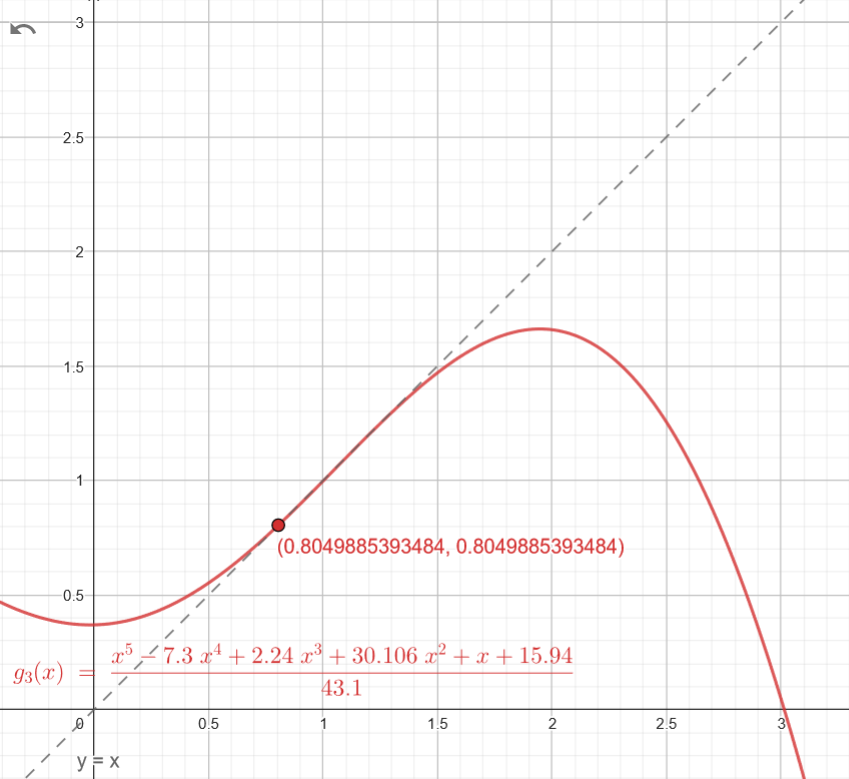

Usando la misma herramienta para graficar $g_2'(x)$, se puede ver que la función tiene un máximo en $x=1,05858 ± 0,0001$ y decrece muy rápidamente hasta un mínimo en $x=4,02755 ± 0,0001$, con lo que no cumple que la condición $|g_2'(x)| <1$

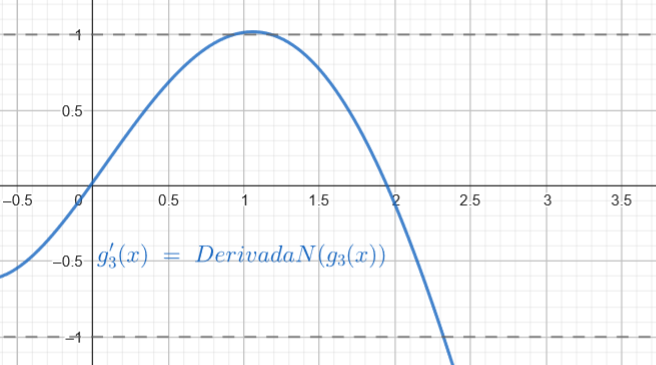

&nbsp;&nbsp;&nbsp; Se propone entonces achicar el intervalo y analizar $f_2(x)=0$ con el método de punto fijo en el intervalo [0 ; 0,9]. Como el método de punto fijo no toma como parámetro de entrada el intervalo, esperamos que se nos permita esta aproximación para resolver el inciso, ya que no encontramos otra que resolviera lo pedido. Con este intervalo, la $g_2(x)$ propuesta verifica los criterios de unicidad ($|g_2(x)| < 1 $ ) y existencia ( $g_2(x)$ continua en el intervalo y $∃\ g_2(x_o)\ ∀\ x_o ∈ [0;0,9]$).

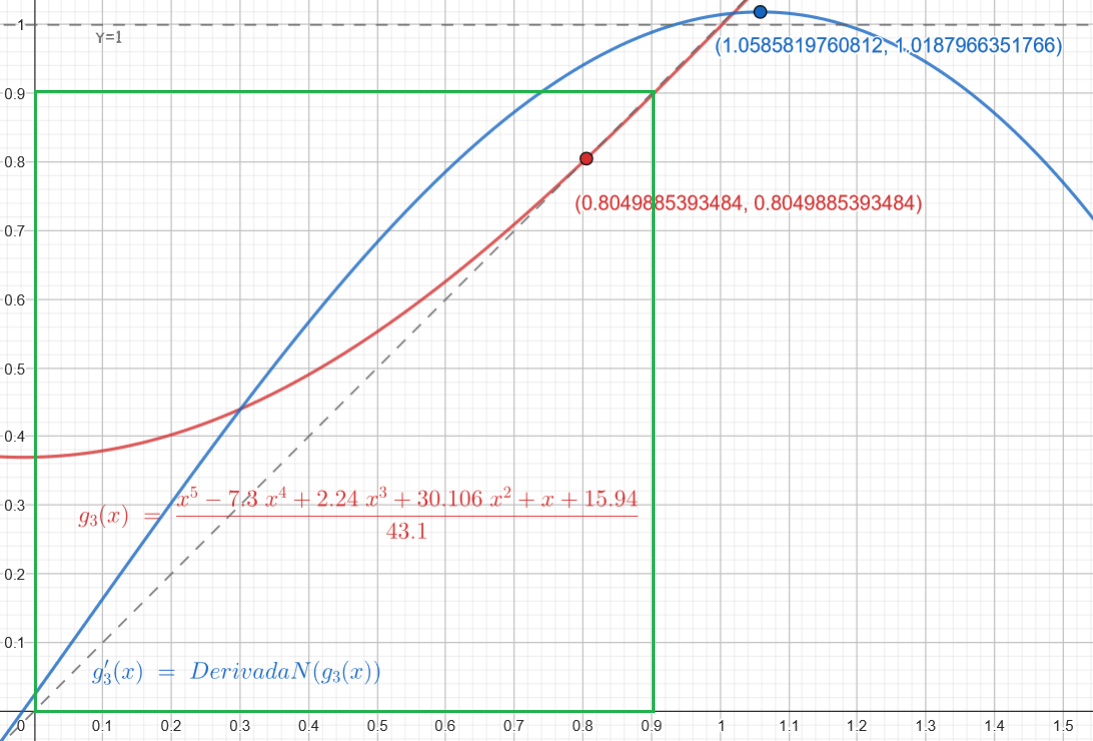

In [ ]:
def g2(x):
  return ((x**5) - (7.3*x**(4)) + (2.24*x**(3)) + (30.106 *x**2) +x + 15.94)/(43.1)


Para ejecutar esta $g_2(x)$ se propone usar como semilla la segunda interación del método de bisección realizado anteriormente. Nuestra semilla es $x_o=0.75$

In [ ]:
punto_fijo_1_f2 = punto_fijo(0.75,  g2, 10**-5)#Punto Fijo 10**-5
tabla_datos_punto_fijo_1_f2 = pd.DataFrame(punto_fijo_1_f2)
tabla_datos_punto_fijo_1_f2 = tabla_datos_punto_fijo_1_f2.drop(0)
tabla_datos_punto_fijo_1_f2

,num_de_iter,raiz,error
1,1,7.53995e-01,3.99453e-03
2,2,7.57633e-01,3.63872e-03
3,3,7.60957e-01,3.32398e-03
4,4,7.64001e-01,3.04421e-03
5,5,7.66796e-01,2.79441e-03
...,...,...,...
92,92,8.04776e-01,1.25658e-05
93,93,8.04788e-01,1.18623e-05
94,94,8.04799e-01,1.11982e-05
95,95,8.04810e-01,1.05714e-05


In [ ]:
punto_fijo_2_f2 = punto_fijo(0.75,  g2, 10**-13)#Punto Fijo 10**-13
tabla_datos_punto_fijo_2_f2 = pd.DataFrame(punto_fijo_2_f2)
tabla_datos_punto_fijo_2_f2 = tabla_datos_punto_fijo_2_f2.drop(0)
tabla_datos_punto_fijo_2_f2

,num_de_iter,raiz,error
1,1,7.53995e-01,3.99453e-03
2,2,7.57633e-01,3.63872e-03
3,3,7.60957e-01,3.32398e-03
4,4,7.64001e-01,3.04421e-03
5,5,7.66796e-01,2.79441e-03
...,...,...,...
413,413,8.04989e-01,1.21458e-13
414,414,8.04989e-01,1.14797e-13
415,415,8.04989e-01,1.08358e-13
416,416,8.04989e-01,1.02141e-13


### Secante <a name= "secantef2"></a>

&nbsp;&nbsp;&nbsp; Para el método secante, solo se ejecuta la fucion definida para las tolerancias especificadas. Los resultados son los siguientes:

In [ ]:
secante_1_f2 = metodo_de_la_secante(0, 3, 10**-5, f2)
tabla_datos_secante_1_f2 = pd.DataFrame(secante_1_f2)
tabla_datos_secante_1_f2 = tabla_datos_secante_1_f2.drop(0)
tabla_datos_secante_1_f2



,num_de_iter,raiz,error
1,1,3.34018e-01,2.66598e+00
2,2,4.39351e-01,1.05333e-01
3,3,6.03651e-01,1.64300e-01
4,4,6.90204e-01,8.65531e-02
5,5,7.52580e-01,6.23756e-02
6,6,7.86459e-01,3.38797e-02
7,7,8.01101e-01,1.46412e-02
8,8,8.04649e-01,3.54852e-03
9,9,8.04982e-01,3.32795e-04
10,10,8.04989e-01,6.64688e-06


In [ ]:
secante_2_f2 = metodo_de_la_secante(0, 3, 10**-13, f2)
tabla_datos_secante_2_f2 = pd.DataFrame(secante_2_f2)
tabla_datos_secante_2_f2 = tabla_datos_secante_2_f2.drop(0)
tabla_datos_secante_2_f2


,num_de_iter,raiz,error
1,1,3.34018e-01,2.66598e+00
2,2,4.39351e-01,1.05333e-01
3,3,6.03651e-01,1.64300e-01
4,4,6.90204e-01,8.65531e-02
5,5,7.52580e-01,6.23756e-02
6,6,7.86459e-01,3.38797e-02
7,7,8.01101e-01,1.46412e-02
8,8,8.04649e-01,3.54852e-03
9,9,8.04982e-01,3.32795e-04
10,10,8.04989e-01,6.64688e-06


### Newton-Raphson <a name= "nrf2"></a>


&nbsp;&nbsp;&nbsp; Si se hace el mismo análisis realizado para $f_1(x)$ vemos que la semilla propuesta $x_0=0,5$ es válida, ya que la sucesión de derivadas por Newton converge a la solución. Vemos que interseca al eje de las x dentro del rango acotado para Newton Raphson. Podemos considerar el [0,5 ; 0,7].

&nbsp;&nbsp;&nbsp; Al igual que el método secante, se ejecuta el código para las tolerancias especificadas y se registran las cotas de error

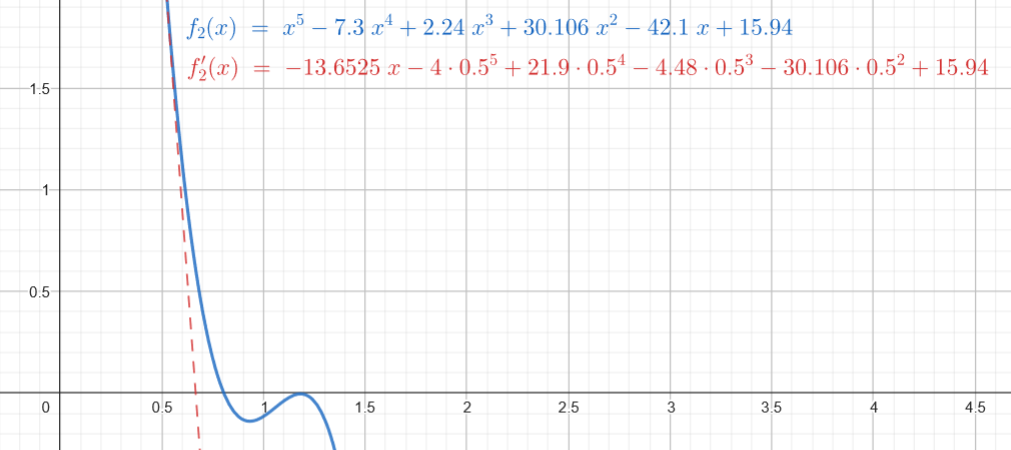

In [ ]:
newtonr_1_f2 = newtonraphson(0.5, 10**-5, f2, f2_prima)
tabla_datos_newtonr_1_f2 = pd.DataFrame(newtonr_1_f2)
tabla_datos_newtonr_1_f2= tabla_datos_newtonr_1_f2.drop(0)
tabla_datos_newtonr_1_f2

,num_de_iter,raiz,error
1,1,6.66392e-01,1.66392e-01
2,2,7.58027e-01,9.16349e-02
3,3,7.96733e-01,3.87060e-02
4,4,8.04660e-01,7.92743e-03
5,5,8.04988e-01,3.27709e-04
6,6,8.04989e-01,5.51257e-07


In [ ]:
newtonr_2_f2 = newtonraphson(0.5, 10**-13, f2, f2_prima)
tabla_datos_newtonr_2_f2 = pd.DataFrame(newtonr_2_f2)
tabla_datos_newtonr_2_f2= tabla_datos_newtonr_2_f2.drop(0)
tabla_datos_newtonr_2_f2

,num_de_iter,raiz,error
1,1,6.66392e-01,1.66392e-01
2,2,7.58027e-01,9.16349e-02
3,3,7.96733e-01,3.87060e-02
4,4,8.04660e-01,7.92743e-03
5,5,8.04988e-01,3.27709e-04
6,6,8.04989e-01,5.51257e-07
7,7,8.04989e-01,1.55898e-12
8,8,8.04989e-01,7.77156e-16


### Newton-Raphson modificado <a name= "nrmodf2"></a>

&nbsp;&nbsp;&nbsp; Al igual que el método anterior, se ejecuta el código para las tolerancias especificadas y se registran las cotas de error.

In [ ]:
newtonrm_1_f2 = newtonraphson_modificado(0.5, 10**-5, f2, f2_prima, f2_prima_prima)
tabla_datos_newtonrm_1_f2 = pd.DataFrame(newtonrm_1_f2)
tabla_datos_newtonrm_1_f2 = tabla_datos_newtonrm_1_f2.drop(0)
tabla_datos_newtonrm_1_f2

,num_de_iter,raiz,error
1,1,8.95556e-01,3.95556e-01
2,2,8.66414e-01,2.91412e-02
3,3,8.30871e-01,3.55434e-02
4,4,8.08922e-01,2.19487e-02
5,5,8.05070e-01,3.85252e-03
6,6,8.04989e-01,8.10453e-05
7,7,8.04989e-01,3.37325e-08


In [ ]:
newtonrm_2_f2 = newtonraphson_modificado(0.5, 10**-13, f2, f2_prima, f2_prima_prima)
tabla_datos_newtonrm_2_f2 = pd.DataFrame(newtonrm_2_f2)
tabla_datos_newtonrm_2_f2 = tabla_datos_newtonrm_2_f2.drop(0)
tabla_datos_newtonrm_2_f2

,num_de_iter,raiz,error
1,1,8.95556e-01,3.95556e-01
2,2,8.66414e-01,2.91412e-02
3,3,8.30871e-01,3.55434e-02
4,4,8.08922e-01,2.19487e-02
5,5,8.05070e-01,3.85252e-03
6,6,8.04989e-01,8.10453e-05
7,7,8.04989e-01,3.37325e-08
8,8,8.04989e-01,5.21805e-15


## Análisis de $f_3(x)$ <a name= "analisisf3"></a>

&nbsp;&nbsp;&nbsp; Comenzamos el análisis graficando $f_3(x)$ para elegir una semilla adecuada

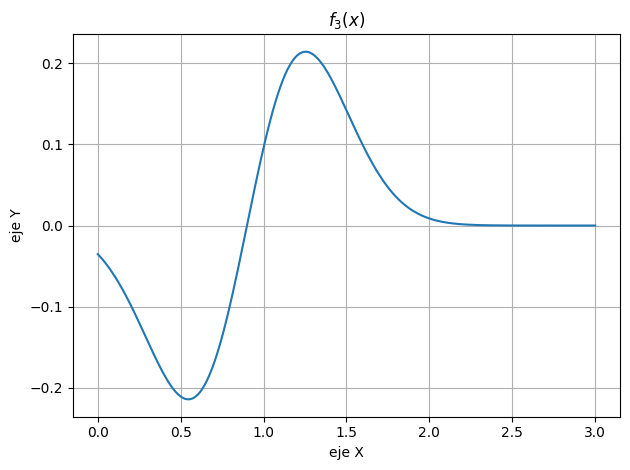

In [ ]:
graficar_funcion(f3, "$f_3(x)$") #se observa que la raíz está aproximadamente x = 0.9

### Bisección <a name= "biseccionf3"></a>

Ejecutamos la función bisección para el intervalo [0,3] y cargamos en la tabla de abajo los valores de error en las iteraciones.

In [ ]:
biseccion_1_f3 = biseccion(0, 3, 10**-5, f3) #con una tolerancia de 10**-5
tabla_datos_biseccion_1_f3 = pd.DataFrame(biseccion_1_f3)
tabla_datos_biseccion_1_f3 = tabla_datos_biseccion_1_f3.drop(0)
tabla_datos_biseccion_1_f3

,num_de_iter,raiz,error
1,1,1.50000e+00,1.50000e+00
2,2,7.50000e-01,7.50000e-01
3,3,1.12500e+00,3.75000e-01
4,4,9.37500e-01,1.87500e-01
5,5,8.43750e-01,9.37500e-02
6,6,8.90625e-01,4.68750e-02
7,7,9.14062e-01,2.34375e-02
8,8,9.02344e-01,1.17188e-02
9,9,8.96484e-01,5.85938e-03
10,10,8.99414e-01,2.92969e-03


In [ ]:
biseccion_2_f3 = biseccion(0, 3, 10**-13, f3) #con una tolerancia de 10**-13
tabla_datos_biseccion_2_f3 = pd.DataFrame(biseccion_2_f3)
tabla_datos_biseccion_12_f3 = tabla_datos_biseccion_2_f3.drop(0)
tabla_datos_biseccion_2_f3

,num_de_iter,raiz,error
0,0,0.00000e+00,-
1,1,1.50000e+00,1.50000e+00
2,2,7.50000e-01,7.50000e-01
3,3,1.12500e+00,3.75000e-01
4,4,9.37500e-01,1.87500e-01
5,5,8.43750e-01,9.37500e-02
6,6,8.90625e-01,4.68750e-02
7,7,9.14062e-01,2.34375e-02
8,8,9.02344e-01,1.17188e-02
9,9,8.96484e-01,5.85938e-03


### Punto fijo <a name= "pfijof3"></a>


&nbsp;&nbsp;&nbsp; Ahora para usar el método del punto fijo, se debe definir una función $g_3(x)$, que cumpla con las condiciones del teorema del punto fijo que establece que:


*   $g_3$ sea continua en el intervalo [0,3] tal que $g(x_o)$ pertenezca a [0,3] para todas las $x_o$  en [0,3]. (existencia)


*   Además que existe $g'_3$ en (0,3) y que existe una constante $0 < k < 1$ con $|g'(x)| <= k$. (unicidad)

&nbsp;&nbsp;&nbsp; Estas dos condiciones aseguran la convergencia al único punto fijo en el intervalo. Entonces, definimos $g_3(x)$ y escribimos las tablas para las tolerancias respecivas.

Se procede a igualar $f_3(x) =0$ para poder despejar $x = g_3(x)$.

En este caso nos queda la relación $(x-0,9)e^{-4(x-0,9)^2}=0$. Como $e^{-4(x-0,9)^2}$ es distinto a 0 para todo x en el dominio de la función, se divide a ambos lados de la igualdad por dicho término. Se obtiene la relación $x = 0,9$. Podemos reescribirlo como $3x - 2x = 0,9 ⇒$

$ x  = \frac{0,9+2x}{3} ⇒ g_3(x) =\frac{0,9+2x}{3}$

*  Si usamos *Geogebra* para graficar $g_3(x)$ y $g'_3(x)$, vemos graficamente que $g_3(x)$ "entra por izquierda y sale por derecha" del cuadrado de vértices (0,0) , (0,3), (3,3) y (3,0) por lo que **se cumple la condición de existencia** ( $ ∃ \ g_1(x_o) ∈ [0,3] \ ∀ \ x_o ∈[0,3]$ )

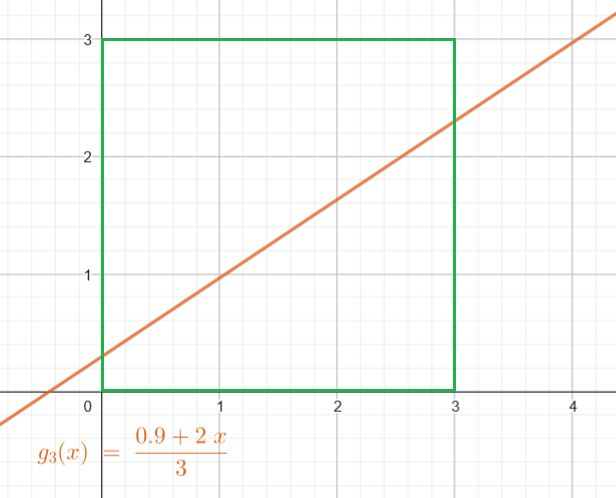

*  Viendo el gráfico de $g_1'(x)$, se observa que $|g'_1(x)| < 1 \ ∀ \ x ∈ [0,3]$, con lo que también **se verifica la condición de unicidad**. De hecho, como además se cumple que $0< g_1'(x) < 1$, podemos afirmar que el método tendrá convergencia monótona

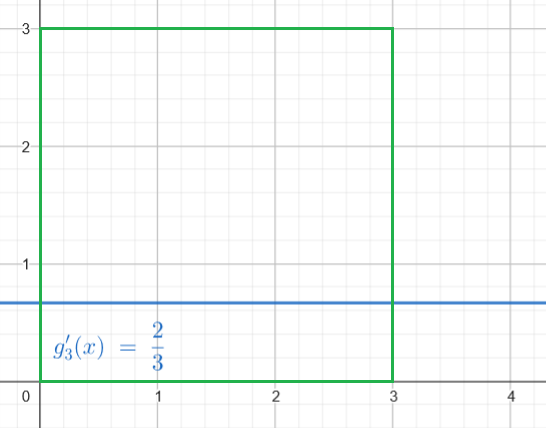

Luego, se puede afirmar que $g_3(x)$ tiene un único punto fijo en el intervalo [0,3] y la usaremos para hallar la raíz de $f_3(x)$ con el método de punto fijo.

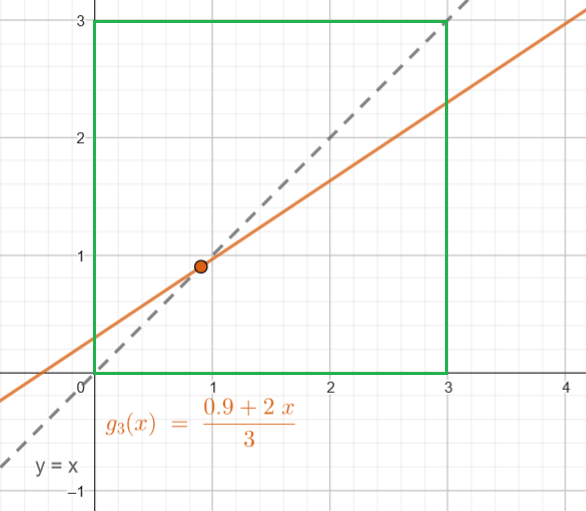

In [ ]:
def g3(x):
    return (0.9+2*x)/3

In [ ]:
punto_fijo_1_f3 = punto_fijo(0.5,  g3, 10**-5)#Punto Fijo 10**-5
tabla_datos_punto_fijo_1_f3 = pd.DataFrame(punto_fijo_1_f3)
tabla_datos_punto_fijo_1_f3 = tabla_datos_punto_fijo_1_f3.drop(0)
tabla_datos_punto_fijo_1_f3

,num_de_iter,raiz,error
1,1,6.33333e-01,1.33333e-01
2,2,7.22222e-01,8.88889e-02
3,3,7.81481e-01,5.92593e-02
4,4,8.20988e-01,3.95062e-02
5,5,8.47325e-01,2.63374e-02
6,6,8.64883e-01,1.75583e-02
7,7,8.76589e-01,1.17055e-02
8,8,8.84393e-01,7.80369e-03
9,9,8.89595e-01,5.20246e-03
10,10,8.93063e-01,3.46831e-03


In [ ]:
punto_fijo_2_f3 = punto_fijo(0.5,  g3, 10**-13)#Punto Fijo 10**-13
tabla_datos_punto_fijo_2_f3 = pd.DataFrame(punto_fijo_2_f3)
tabla_datos_punto_fijo_2_f3 = tabla_datos_punto_fijo_2_f3.drop(0)
tabla_datos_punto_fijo_2_f3

,num_de_iter,raiz,error
1,1,6.33333e-01,1.33333e-01
2,2,7.22222e-01,8.88889e-02
3,3,7.81481e-01,5.92593e-02
4,4,8.20988e-01,3.95062e-02
5,5,8.47325e-01,2.63374e-02
...,...,...,...
66,66,9.00000e-01,4.77618e-13
67,67,9.00000e-01,3.18412e-13
68,68,9.00000e-01,2.12275e-13
69,69,9.00000e-01,1.41442e-13


### Secante <a name= "secantef3"></a>
&nbsp;&nbsp;&nbsp; Para que el método de la secante no genere un error llamado "OverflowError: (34, 'Numerical result out of range')"  que generalmente ocurre cuando los cálculos generan números demasiado grandes o demasiado pequeños que no pueden ser representados por el tipo de datos utilizado, se tuvo que achicar el intervalo a [0.5, 1], y de esta manera pudo aproximar mejor la raíz.

In [ ]:
secante_1_f3 = metodo_de_la_secante(0.5, 1, 10**-5, f3)
tabla_datos_secante_1_f3 = pd.DataFrame(secante_1_f3)
tabla_datos_secante_1_f3 = tabla_datos_secante_1_f3.drop(0)
tabla_datos_secante_1_f3

,num_de_iter,raiz,error
1,1,8.43518e-01,1.56482e-01
2,2,9.00987e-01,5.74693e-02
3,3,8.99988e-01,9.99318e-04
4,4,9.00000e-01,1.24500e-05
5,5,9.00000e-01,4.78887e-11


In [ ]:
secante_2_f3 = metodo_de_la_secante(0.5, 1, 10**-13, f3)
tabla_datos_secante_2_f3 = pd.DataFrame(secante_2_f3)
tabla_datos_secante_2_f3 = tabla_datos_secante_2_f3.drop(0)
tabla_datos_secante_2_f3.loc[6, 'error'] = 1e-15 #mofico ya que la computadora muestra error 0
tabla_datos_secante_2_f3

,num_de_iter,raiz,error
1,1,8.43518e-01,1.56482e-01
2,2,9.00987e-01,5.74693e-02
3,3,8.99988e-01,9.99318e-04
4,4,9.00000e-01,1.24500e-05
5,5,9.00000e-01,4.78887e-11
6,6,9.00000e-01,1.00000e-15


### Newton-Raphson <a name= "nrf3"></a>


&nbsp;&nbsp;&nbsp; Al analizar la gráfica de $f_3(x)$ vemos que la recta tangente a la función en $f_3(0.5)$ interseca al eje x en un punto donde la sucesión de derivadas va a diverger de la solución.

&nbsp;&nbsp;&nbsp; Cuando se busca con Newton-Raphson la raíz, con la semilla especificada no se puede continuar porque $f_3'(x)$ se anula en una aproximación de la derivada, si bien no tiene un raíz allí esto puede ocurrir por errores de redondeo de la herramienta utilizada. Entonces para que si converga se elige una raíz más cercana.


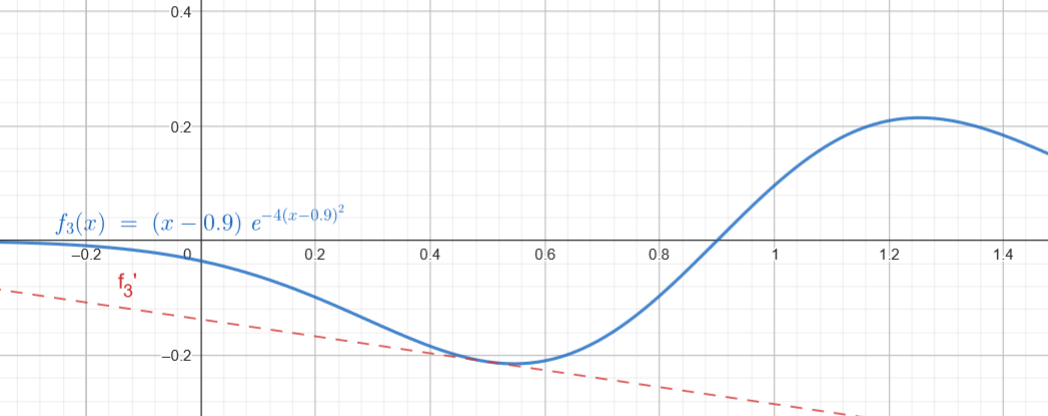

&nbsp;&nbsp;&nbsp; Debemos considerar una semilla que se encuentre dentro del intervalo [0,55; 1,25]. Si proponemos usar la semmilla $x_0 = 0,7$, vemos en el gráfico que la sucesión de derivadas no se anula y va a converger a la solución


&nbsp;&nbsp;&nbsp; Al igual que el método secante, se ejecuta el código para las tolerancias especificadas y se registran las cotas de error.

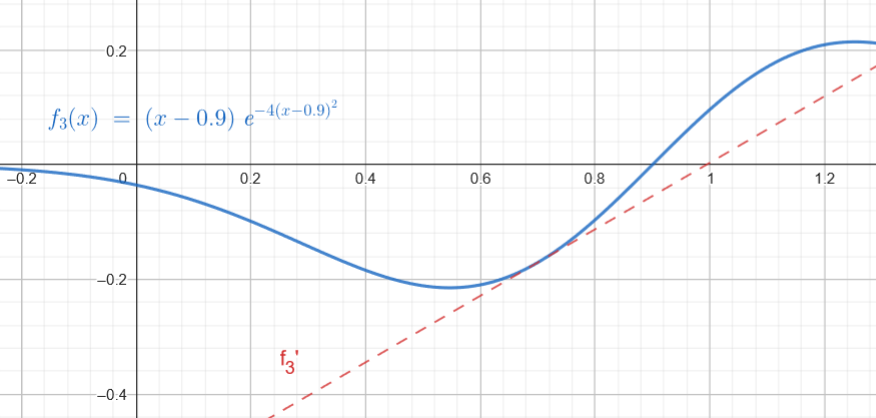

In [ ]:
newtonr_1_f3 = newtonraphson(0.7, 10**-5, f3, f3_prima)
tabla_datos_newtonr_1_f3 = pd.DataFrame(newtonr_1_f3)
tabla_datos_newtonr_1_f3 = tabla_datos_newtonr_1_f3.drop(0)
tabla_datos_newtonr_1_f3

,num_de_iter,raiz,error
1,1,9.94118e-01,2.94118e-01
2,2,8.92822e-01,1.01296e-01
3,3,9.00003e-01,7.18131e-03
4,4,9.00000e-01,2.96034e-06


In [ ]:
newtonr_2_f3 = newtonraphson(0.7, 10**-13, f3, f3_prima)
tabla_datos_newtonr_2_f3 = pd.DataFrame(newtonr_2_f3)
tabla_datos_newtonr_2_f3 = tabla_datos_newtonr_2_f3.drop(0)
tabla_datos_newtonr_2_f3

,num_de_iter,raiz,error
1,1,9.94118e-01,2.94118e-01
2,2,8.92822e-01,1.01296e-01
3,3,9.00003e-01,7.18131e-03
4,4,9.00000e-01,2.96034e-06
5,5,9.00000e-01,2.22045e-16


### Newton-Raphson modificado <a name= "nrmodf2"></a>

&nbsp;&nbsp;&nbsp; Al igual que el método anterior, se ejecuta el código para las tolerancias especificadas y se registran las cotas de error. Como para usar newton raphson modificado no se especificaba una semilla en el enunciado, se decidió elegir con el mismo análisis hecho para el método de Newton-Raphson de 0.7 y se observa que el método converge.

In [ ]:
newtonrm_1_f3 = newtonraphson_modificado(0.7, 10**-5, f3, f3_prima, f3_prima_prima)
tabla_datos_newtonrm_1_f3 = pd.DataFrame(newtonrm_1_f3)
tabla_datos_newtonrm_1_f3 = tabla_datos_newtonrm_1_f3 .drop(0)
tabla_datos_newtonrm_1_f3

,num_de_iter,raiz,error
1,1,7.93923e-01,9.39227e-02
2,2,8.77287e-01,8.33644e-02
3,3,8.99492e-01,2.22048e-02
4,4,9.00000e-01,5.07985e-04
5,5,9.00000e-01,1.67305e-07


In [ ]:
newtonrm_2_f3 = newtonraphson_modificado(0.7, 10**-13, f3, f3_prima, f3_prima_prima)
tabla_datos_newtonrm_2_f3 = pd.DataFrame(newtonrm_2_f3)
tabla_datos_newtonrm_2_f3 = tabla_datos_newtonrm_2_f3 .drop(0)
tabla_datos_newtonrm_2_f3

,num_de_iter,raiz,error
1,1,7.93923e-01,9.39227e-02
2,2,8.77287e-01,8.33644e-02
3,3,8.99492e-01,2.22048e-02
4,4,9.00000e-01,5.07985e-04
5,5,9.00000e-01,1.67305e-07
6,6,9.00000e-01,1.78746e-14


##&nbsp;&nbsp;&nbsp;**Obtención de $x_{real}$** <a name="xreal"></a>

&nbsp;&nbsp;&nbsp; Llamamos $x_{real}$ al valor obtenido mediante el uso de la función scipy.optimize.brentq de Python para encontrar la raíz de una función. A contiuación se define la función y el intervalo para $f_1(x)$, $f_2(x)$ y $f_3(x)$. Con esto podemos comparar el valor "real" de la raíz con los métodos numéricos usados anteriormente.

In [ ]:
x_real_f1 =  brentq(f1, 0, 3)
print(x_real_f1)



2.668401648721945


In [ ]:
x_real_f2 =  brentq(f2, 0, 3)
print(x_real_f2)

0.804988539348394


In [ ]:
x_real_f3 =  brentq(f3, 0, 3)
print(x_real_f3)

0.8999999999998904


##&nbsp;&nbsp;&nbsp;**Análisis de convergencia** <a name="analisis 3"></a>


&nbsp;&nbsp;&nbsp; Para el análisis de convergencia de los métodos empleados, en esta sección se graficarán a continuación:

*   Orden de convergencia P vs iteraciones
*   Constante asisntótica λ vs iteraciones
* $log_{10}(|∆x|)$ vs iteraciones
* $log_{10}(|x_{Candidata} − x_{Real}|)$ vs iteraciones




In [ ]:
TOLERANCIA = 10**-10

# Funciones graficadoras y generadoras de valores x e y:
# Construidas para facilitar la lectura y comprensión del código y la obtención de los gráficos.

**Funciones alfa, constante asintótica, $log_{10}(|∆x|)$ y $log_{10}(|x_{Candidata} − x_{Real}|)$:**

In [ ]:
def alfa(p0, p1, p2, p3):
  # donde p0 -> Xn-2, p1 -> Xn-1, p2 -> Xn, p3 -> Xn+1
  numerador = abs((p3-p2)/(p2-p1))
  denominador = abs((p2-p1)/(p1-p0))

  return abs(np.log( numerador )/ np.log( denominador ))

def constante_asintotica(p0, p1, p2, orden_convergencia):
  #p0 -> Xn-2, p1 ->Xn-1, p2 -> Xn
  numerador = abs(p2 - p1)
  denominador = (abs(p0- p1))
  return numerador/(denominador)**(orden_convergencia)

def log10cota_de_error(cota_error):
  return math.log10(cota_error)

def log10candidata_menos_real(x_candidata, x_real):
  return np.log10(abs(x_candidata - x_real))


**Funciones generadoras de puntos en  x e y:**

In [ ]:
def graficar_orden_convergencia(tabla_biseccion, tabla_datos_punto_fijo, tabla_datos_secante, tabla_datos_newtonr, tabla_datos_newtonrm):
  fig, ax = plt.subplots() # creo esto para graficar múltiples funciones
  #biseccion
  x_1, y_1 = generar_x_y_para_orden_convergencia(tabla_biseccion)
  ax.plot(x_1, y_1, label='bisección')

  #punto fijo
  x_2, y_2 = generar_x_y_para_orden_convergencia(tabla_datos_punto_fijo)
  ax.plot(x_2, y_2, label='punto fijo')
  #secante
  x_3, y_3 = generar_x_y_para_orden_convergencia(tabla_datos_secante)
  ax.plot(x_3, y_3, label='secante')

  #newton raphson

  x_4, y_4 = generar_x_y_para_orden_convergencia(tabla_datos_newtonr)
  ax.plot(x_4, y_4, label='newton raphson')

  #newton raphson modificado

  x_5, y_5 = generar_x_y_para_orden_convergencia(tabla_datos_newtonrm)
  ax.plot(x_5, y_5, label='newton raphson modificado')
  # Agregar leyenda y título a la gráfica
  ax.legend()
  ax.set_title('Función  | Orden de convergencia de los métodos')
  ax.set_xlabel('Iteraciones')
  ax.set_ylabel('Orden de Convergencia')
  # Mostrar la gráfica
  plt.show()
  return y_1, y_2, y_3, y_4, y_5

def graficar_constante_asintotica(tabla_biseccion, tabla_datos_punto_fijo, tabla_datos_secante, tabla_datos_newtonr, tabla_datos_newtonrm, ord_conv1, ord_conv2, ord_conv3, ord_conv4, ord_conv5):
  fig, ax = plt.subplots() # creo esto para graficar múltiples funciones
  #biseccion
  x_1_ca, y_1_ca = generar_x_y_para_constante_asintotica(tabla, ord_conv1)
  ax.plot(x_1_ca, y_1_ca, label='bisección')

  #punto fijo
  x_2_ca, y_2_ca = generar_x_y_para_constante_asintotica(tabla_datos_punto_fijo, ord_conv2)
  ax.plot(x_2_ca, y_2_ca, label='punto fijo')

  #secante
  x_3_ca, y_3_ca = generar_x_y_para_constante_asintotica(tabla_datos_newtonr, ord_conv3)
  ax.plot(x_3_ca, y_3_ca, label='secante')

  #newton raphson
  x_4_ca, y_4_ca = generar_x_y_para_constante_asintotica(tabla_datos_newtonr, ord_conv4)
  ax.plot(x_4_ca, y_4_ca, label='newton raphson')

  #newton raphson modificado
  x_5_ca, y_5_ca = generar_x_y_para_constante_asintotica(tabla_datos_newtonrm, ord_conv5)
  ax.plot(x_5_ca, y_5_ca, label='newton raphson modificado')


  # Agregar leyenda y título a la gráfica
  ax.legend()
  ax.set_title('Función | Constante asintótica por método')
  ax.set_xlabel('Iteraciones')
  ax.set_ylabel('Constante Asintótica')
  # Mostrar la gráfica
  plt.show()

def graficar_logcotaerror(tabla_biseccion, tabla_datos_punto_fijo, tabla_datos_secante, tabla_datos_newtonr, tabla_datos_newtonrm, x_real):

  fig, ax = plt.subplots() # creo esto para graficar múltiples funciones

  #biseccion
  x_1_logc, y_1_logc = generar_x_y_paralogcotaerror(tabla_biseccion)
  ax.plot(x_1_logc, y_1_logc, label='bisección')

  #punto fijo
  x_2_logc, y_2_logc = generar_x_y_paralogcotaerror(tabla_datos_punto_fijo)
  ax.plot(x_2_logc, y_2_logc, label='punto_fijo')

  #secante
  x_3_logc, y_3_logc = generar_x_y_paralogcotaerror(tabla_datos_secante)
  ax.plot(x_3_logc, y_3_logc, label='secante')

  #newton raphson
  x_4_logc, y_4_logc = generar_x_y_paralogcotaerror(tabla_datos_newtonr)
  ax.plot(x_4_logc, y_4_logc, label='newton raphson')

  #newton raphson modificado
  x_5_logc, y_5_logc = generar_x_y_paralogcotaerror(tabla_datos_newtonrm)
  ax.plot(x_5_logc, y_5_logc, label='newton raphson modificado')


  # Agregar leyenda y título a la gráfica
  ax.legend()
  ax.set_title('Función |  log10(/∆x/) ')
  ax.set_xlabel('Iteraciones')
  ax.set_ylabel('log10(/∆x/)')
  # Mostrar la gráfica
  plt.show()

def logcandidata_menos_real(tabla_biseccion, tabla_datos_punto_fijo, tabla_datos_secante, tabla_datos_newtonr, tabla_datos_newtonrm, x_real):
  fig, ax = plt.subplots() # creo esto para graficar múltiples funciones

  #biseccion
  x_1_logr, y_1_logr = generar_x_y_paralogcandidata_menos_real(tabla_biseccion, x_real)
  ax.plot(x_1_logr, y_1_logr, label='bisección')

  #punto fijo
  x_2_logr, y_2_logr = generar_x_y_paralogcandidata_menos_real(tabla_datos_punto_fijo, x_real)
  ax.plot(x_2_logr, y_2_logr, label='punto fijo')

  #secante
  x_3_logr, y_3_logr = generar_x_y_paralogcandidata_menos_real(tabla_datos_secante, x_real)
  ax.plot(x_3_logr, y_3_logr, label='secante')

  #newton raphson
  x_4_logr, y_4_logr = generar_x_y_paralogcandidata_menos_real(tabla_datos_newtonr, x_real)
  ax.plot(x_4_logr, y_4_logr, label='newton raphson')

  #newton raphson modificado
  x_5_logr, y_5_logr = generar_x_y_paralogcandidata_menos_real(tabla_datos_newtonrm, x_real)
  ax.plot(x_5_logr, y_5_logr, label='newton raphson modificado')

  # Agregar leyenda y título a la gráfica
  ax.legend()
  ax.set_title('Función  |  log10(/xCandidata − xReal/)  ')
  ax.set_xlabel('Iteraciones')
  ax.set_ylabel(' log10(/xCandidata − xReal/)')
  # Mostrar la gráfica
  plt.show()


In [ ]:
def generar_x_y_para_orden_convergencia(tabla):
  x = []
  y = []
  num_iter_alfa = len(tabla.index)
  p0 = 0
  p1 = 1
  p2 = 2
  p3 = 3
  for i in range(num_iter_alfa):
    p0 +=1
    p1 += 1
    p2 +=1
    p3 +=1
    x.append(i+1) #agrego una iteración
    y.append(alfa(tabla.loc[p0, 'raiz'], tabla.loc[p1, 'raiz'], tabla.loc[p2, 'raiz'], tabla.loc[p3, 'raiz']))
    if p3 == num_iter_alfa:
      break
  return x, y

def generar_x_y_para_constante_asintotica(tabla, orden_de_convergencia):
  x = []
  y = []
  num_iter_alfa = len(tabla.index)
  p0 = 0
  p1 = 1
  p2 = 2
  for i in range(num_iter_alfa):
    p0 +=1
    p1 += 1
    p2 += 1
    x.append(i+1) #agrego una iteración
    y.append(constante_asintotica(tabla.loc[p0, 'raiz'], tabla.loc[p1, 'raiz'], tabla.loc[p2, 'raiz'] ,orden_de_convergencia))
    if p2 == num_iter_alfa:
      break
  return x, y

def generar_x_y_paralogcotaerror(tabla):
  x = []
  y = []
  num_iter_alfa = len(tabla.index)
  p0 = 0
  p1 = 1
  for i in range(num_iter_alfa):
    p0 +=1
    p1 += 1
    x.append(i+1) #agrego una iteración
    y.append(log10cota_de_error(abs(tabla.loc[p0, 'raiz'] - tabla.loc[p1, 'raiz']) ))
    if p1 == num_iter_alfa:
      break
  return x, y

def generar_x_y_paralogcandidata_menos_real(tabla, x_real):
  x = []
  y = []
  num_iter_alfa = len(tabla.index)
  p0 = 0
  for i in range(num_iter_alfa):
    p0 +=1
    x.append(i+1) #agrego una iteración
    y.append(log10candidata_menos_real(tabla.loc[p0, 'raiz'], x_real))
    if p0 == num_iter_alfa:
      break
  return x, y

**Funciones graficadoras:**

In [ ]:
def graficar_orden_convergencia_truncada(tabla_biseccion, tabla_datos_punto_fijo, tabla_datos_secante, tabla_datos_newtonr, tabla_datos_newtonrm):
  fig, ax = plt.subplots() # creo esto para graficar múltiples funciones
  #biseccion
  x_1, y_1 = generar_x_y_para_orden_convergencia(tabla_biseccion)
  ax.plot(x_1, y_1, label='bisección')

  #punto fijo
  x_2, y_2 = generar_x_y_para_orden_convergencia(tabla_datos_punto_fijo)
  ax.plot(x_2, y_2, label='punto fijo')
  #secante
  x_3, y_3 = generar_x_y_para_orden_convergencia(tabla_datos_secante)
  ax.plot(x_3, y_3, label='secante')

  #newton raphson

  x_4, y_4 = generar_x_y_para_orden_convergencia(tabla_datos_newtonr)
  ax.plot(x_4, y_4, label='newton raphson')

  #newton raphson modificado

  x_5, y_5 = generar_x_y_para_orden_convergencia(tabla_datos_newtonrm)
  ax.plot(x_5, y_5, label='newton raphson modificado')
  # Agregar leyenda y título a la gráfica
  ax.set_ylim(0, 2)
  ax.legend()
  ax.set_title('Función  | Orden de convergencia de los métodos')
  ax.set_xlabel('Iteraciones')
  ax.set_ylabel('Orden de Convergencia')
  # Mostrar la gráfica
  plt.show()
  return y_1, y_2, y_3, y_4, y_5


def graficar_constante_asintotica_truncada(tabla_biseccion, tabla_datos_punto_fijo, tabla_datos_secante, tabla_datos_newtonr, tabla_datos_newtonrm, ord_conv1, ord_conv2, ord_conv3, ord_conv4, ord_conv5):
  fig, ax = plt.subplots() # creo esto para graficar múltiples funciones
  #biseccion
  x_1_ca, y_1_ca = generar_x_y_para_constante_asintotica(tabla_biseccion, ord_conv1)
  ax.plot(x_1_ca, y_1_ca, label='bisección')

  #punto fijo
  x_2_ca, y_2_ca = generar_x_y_para_constante_asintotica(tabla_datos_punto_fijo, ord_conv2)
  ax.plot(x_2_ca, y_2_ca, label='punto fijo')

  #secante
  x_3_ca, y_3_ca = generar_x_y_para_constante_asintotica(tabla_datos_newtonr, ord_conv3)
  ax.plot(x_3_ca, y_3_ca, label='secante')

  #newton raphson
  x_4_ca, y_4_ca = generar_x_y_para_constante_asintotica(tabla_datos_newtonr, ord_conv4)
  ax.plot(x_4_ca, y_4_ca, label='newton raphson')

  #newton raphson modificado
  x_5_ca, y_5_ca = generar_x_y_para_constante_asintotica(tabla_datos_newtonrm, ord_conv5)
  ax.plot(x_5_ca, y_5_ca, label='newton raphson modificado')


  # Agregar leyenda y título a la gráfica
  ax.set_ylim(0,5)
  ax.legend()
  ax.set_title('Función | Constante asintótica por método')
  ax.set_xlabel('Iteraciones')
  ax.set_ylabel('Constante Asintótica')
  # Mostrar la gráfica
  plt.show()

### Gráficos de $f_1(x)$ <a name= "graff1"></a>


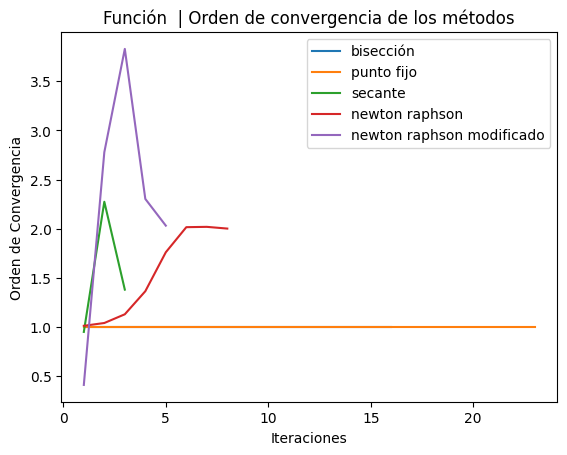

In [ ]:
z1, z2, z3, z4, z5 = graficar_orden_convergencia(tabla_datos_biseccion_1, tabla_datos_punto_fijo_1, tabla_datos_secante_1, tabla_datos_newtonr, tabla_datos_newtonrm_1)

Como no se asimila bien con ese gráfico, se decide limitar la cantidad de puntos en el eje y ya que estos métodos deberían tener orden de convergencia entre (0, 2] con lo que respecta a la teoría

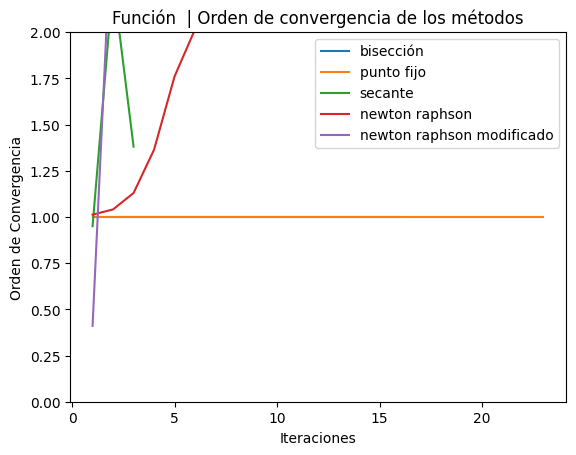

In [ ]:
z1, z2, z3, z4, z5 = graficar_orden_convergencia_truncada(tabla_datos_biseccion_1, tabla_datos_punto_fijo_1, tabla_datos_secante_1, tabla_datos_newtonr, tabla_datos_newtonrm_1)

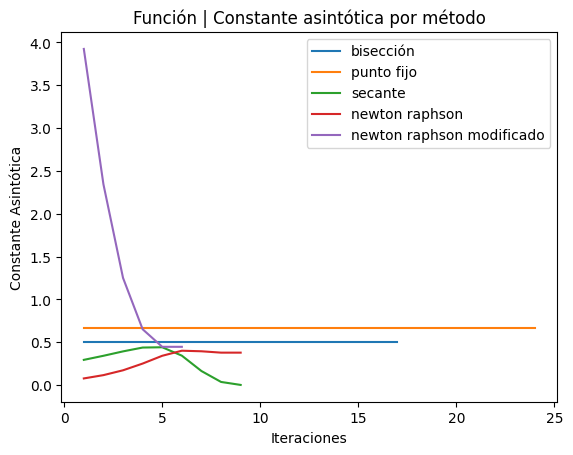

In [ ]:
graficar_constante_asintotica(tabla_datos_biseccion_1, tabla_datos_punto_fijo_1, tabla_datos_secante_1, tabla_datos_newtonr, tabla_datos_newtonrm_1, z1[-1], z2[-1], z3[-1], z4[-1], z5[-1])

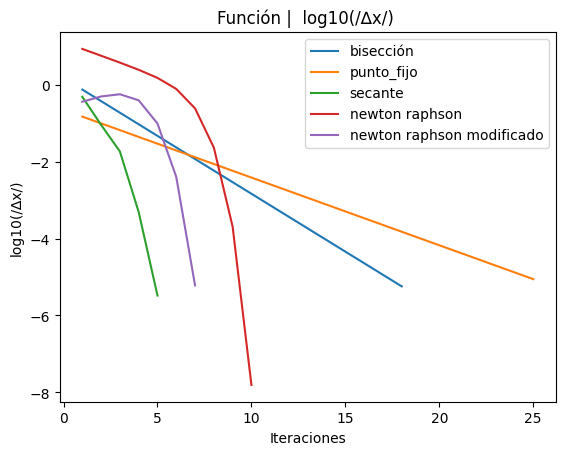

In [ ]:
graficar_logcotaerror(tabla_datos_biseccion_1, tabla_datos_punto_fijo_1, tabla_datos_secante_1, tabla_datos_newtonr,tabla_datos_newtonrm_1, x_real_f1)

<ipython-input-181-00c9d43e76d1>:18: RuntimeWarning: divide by zero encountered in log10
  return np.log10(abs(x_candidata - x_real))


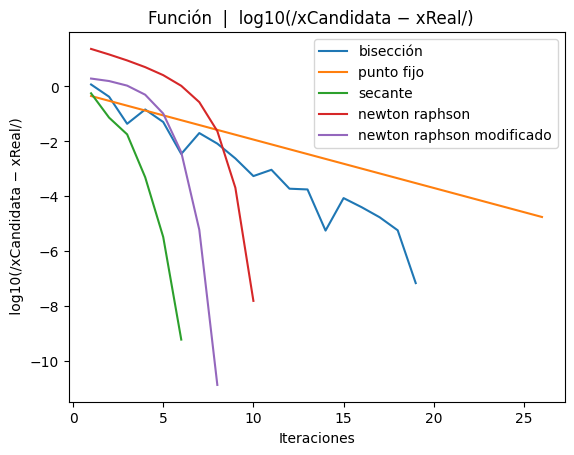

In [ ]:
logcandidata_menos_real(tabla_datos_biseccion_1, tabla_datos_punto_fijo_1, tabla_datos_secante_1, tabla_datos_newtonr, tabla_datos_newtonrm_1, x_real_f1)

### Gráficos de $f_2(x)$ <a name= "graff2"></a>

Ahora se procede a generar las gráficas para la función 2 y se guardan los valores de orden de convergencia.

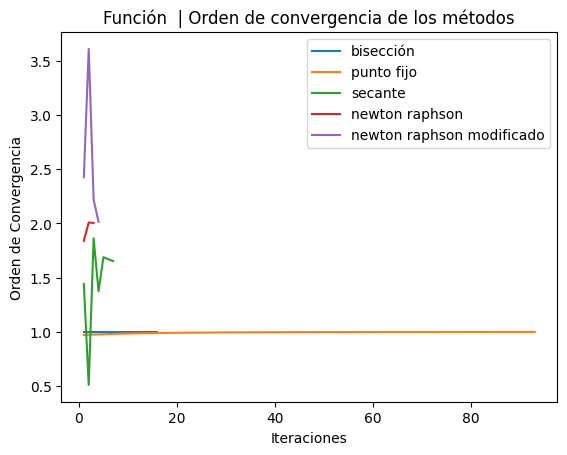

In [ ]:
y1, y2, y3, y4, y5 = graficar_orden_convergencia(tabla_datos_biseccion_1_f2, tabla_datos_punto_fijo_1_f2, tabla_datos_secante_1_f2, tabla_datos_newtonr_1_f2, tabla_datos_newtonrm_1_f2)

Como no se asimila bien con ese gráfico, se decide limitar la cantidad de puntos en el eje y ya que estos métodos deberían tener orden de convergencia entre (0, 2] con lo que respecta a la teoría:

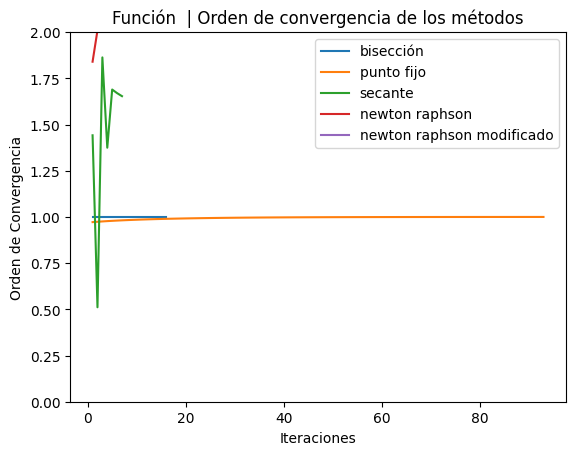

In [ ]:
y1, y2, y3, y4, y5 = graficar_orden_convergencia_truncada(tabla_datos_biseccion_1_f2, tabla_datos_punto_fijo_1_f2, tabla_datos_secante_1_f2, tabla_datos_newtonr_1_f2, tabla_datos_newtonrm_1_f2)

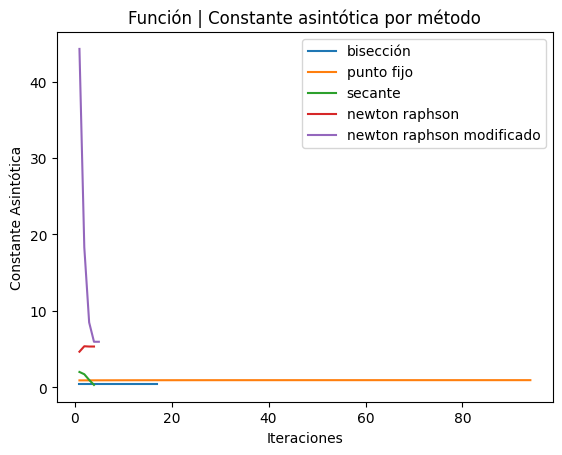

In [ ]:
graficar_constante_asintotica(tabla_datos_biseccion_1_f2, tabla_datos_punto_fijo_1_f2, tabla_datos_secante_1_f2, tabla_datos_newtonr_1_f2, tabla_datos_newtonrm_1_f2, y1[-1], y2[-1], y3[-1], y4[-1], y5[-1])

Para poder observar mejor reducimos la escala:

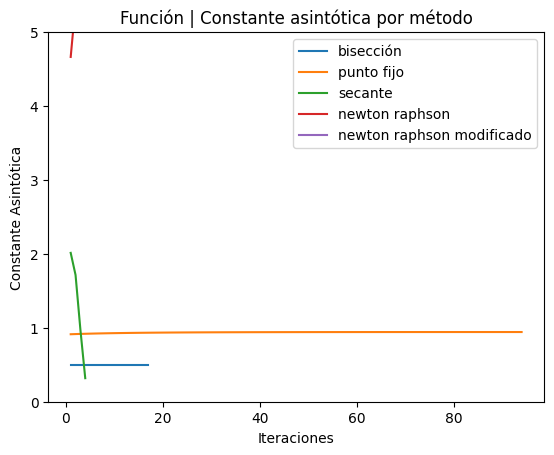

In [ ]:
graficar_constante_asintotica_truncada(tabla_datos_biseccion_1_f2, tabla_datos_punto_fijo_1_f2, tabla_datos_secante_1_f2, tabla_datos_newtonr_1_f2, tabla_datos_newtonrm_1_f2, y1[-1], y2[-1], y3[-1], y4[-1], y5[-1])

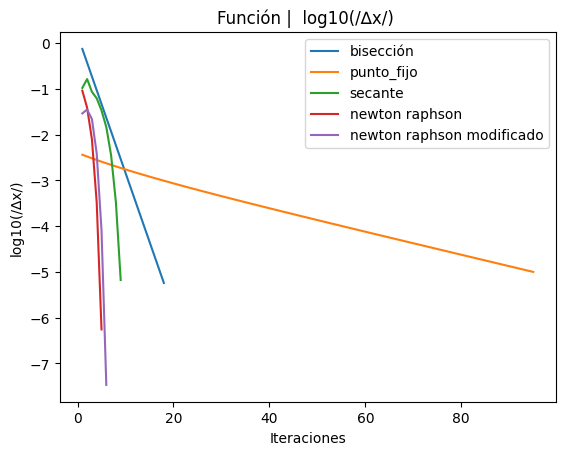

In [ ]:
graficar_logcotaerror(tabla_datos_biseccion_1_f2, tabla_datos_punto_fijo_1_f2, tabla_datos_secante_1_f2, tabla_datos_newtonr_1_f2,tabla_datos_newtonrm_1_f2, x_real_f2)

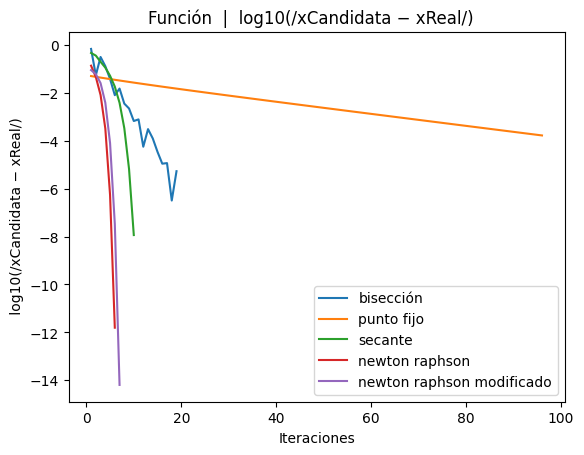

In [ ]:
logcandidata_menos_real(tabla_datos_biseccion_1_f2, tabla_datos_punto_fijo_1_f2, tabla_datos_secante_1_f2, tabla_datos_newtonr_1_f2,tabla_datos_newtonrm_1_f2, x_real_f2)

### Gráficos de $f_3(x)$ <a name= "graff3"></a>

Ahora se proceden a hacer los gráficos para la función 3.

# Aclaración: como se puede observar no se observa bien el orden de convergencia de newton raphson porque sólo se obtuvieron cuatro raíces por lo tanto un punto en el gráfico: [2.9449227190659153]

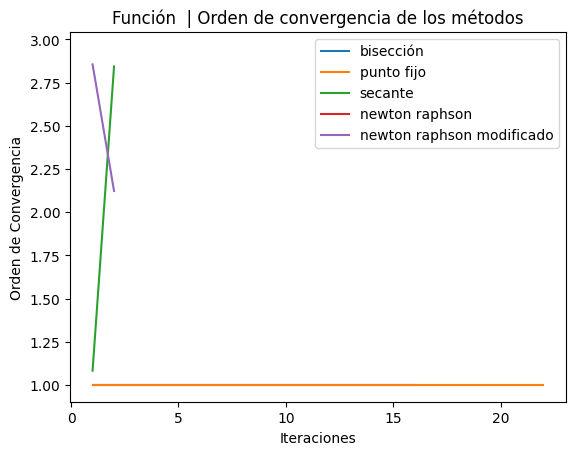

In [ ]:
w1, w2, w3, w4, w5 = graficar_orden_convergencia(tabla_datos_biseccion_1_f3, tabla_datos_punto_fijo_1_f3, tabla_datos_secante_1_f3, tabla_datos_newtonr_1_f3, tabla_datos_newtonrm_1_f3)

Como no se asimila bien con ese gráfico, se decide limitar la cantidad de puntos en el eje y ya que estos métodos deberían tener orden de convergencia entre (0, 2] con lo que respecta a la teoría:

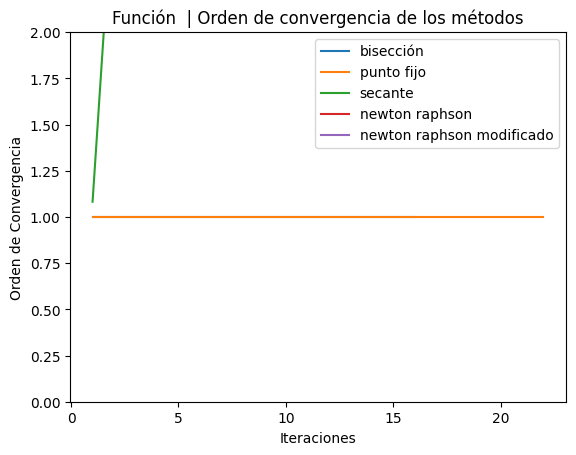

In [ ]:
w1, w2, w3, w4, w5 = graficar_orden_convergencia_truncada(tabla_datos_biseccion_1_f3, tabla_datos_punto_fijo_1_f3, tabla_datos_secante_1_f3, tabla_datos_newtonr_1_f3, tabla_datos_newtonrm_1_f3)

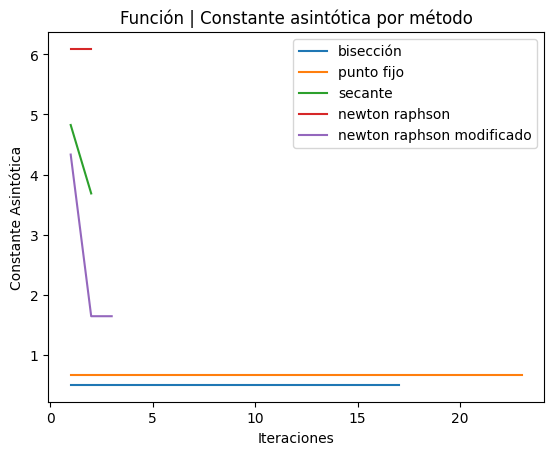

In [ ]:
graficar_constante_asintotica(tabla_datos_biseccion_1_f3, tabla_datos_punto_fijo_1_f3, tabla_datos_secante_1_f3, tabla_datos_newtonr_1_f3, tabla_datos_newtonrm_1_f3, w1[-1], w2[-1], w3[-1], w4[-1], w5[-1])

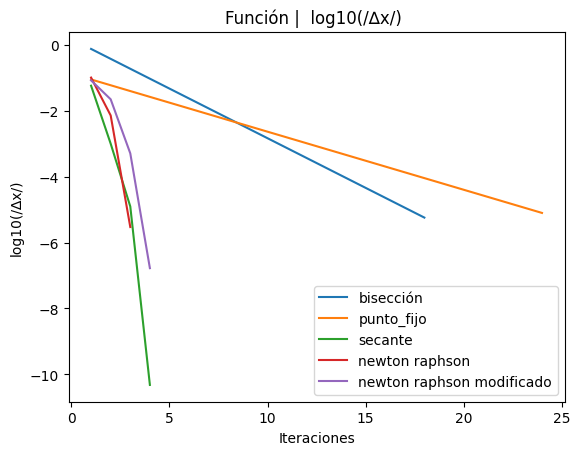

In [ ]:
graficar_logcotaerror(tabla_datos_biseccion_1_f3, tabla_datos_punto_fijo_1_f3, tabla_datos_secante_1_f3, tabla_datos_newtonr_1_f3, tabla_datos_newtonrm_1_f3, x_real_f3)

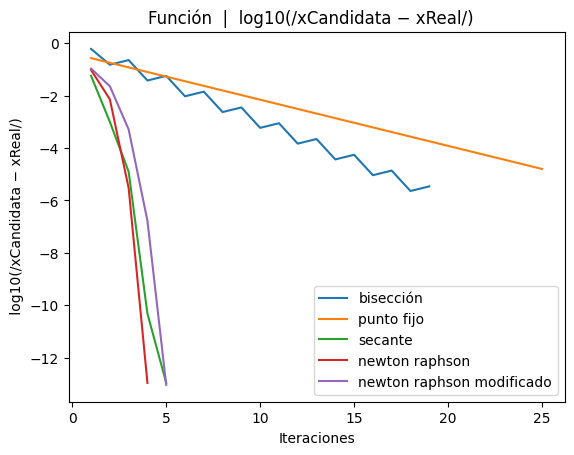

In [ ]:
logcandidata_menos_real(tabla_datos_biseccion_1_f3, tabla_datos_punto_fijo_1_f3, tabla_datos_secante_1_f3, tabla_datos_newtonr_1_f3, tabla_datos_newtonrm_1_f3, x_real_f3)

##&nbsp;&nbsp;&nbsp;**Análisis de resultados** <a name="analisisres"></a>


&nbsp;&nbsp;&nbsp; Como podemos ver en la tabla, cada método aproxima a la función en un cierto número de intentos con su cota de error. En verde destacamos aquellos que obtuvieron mayor precisión, en amarillo aquellos que tomaron la menor cantidad de intentos, y en rojo aquellos que tomaron la mayor cantidad de intentos.

Para las 3 funciones el método de la biseccion tomó una gran cantidad de intentos, y el método de Newton-Raphson alcanzón un error muy bajo en pocos intentos.



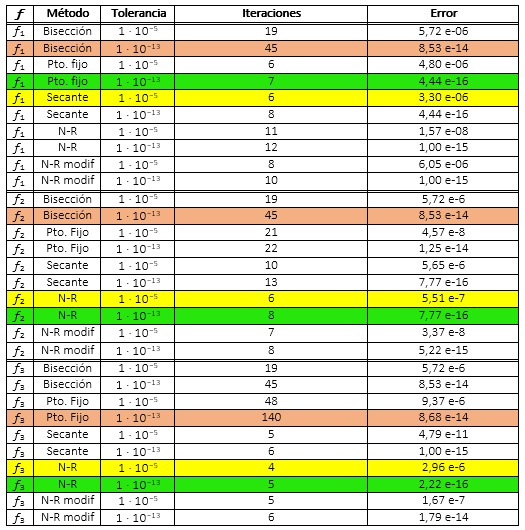


&nbsp;&nbsp;&nbsp; En general, las ventajas y desventajas encontradas para cada método son las que se esperan en base a la teoría. Los métodos más simples y robustos, como la bisección y el método del punto fijo, son más lentos y requieren más iteraciones que los métodos más sofisticados, como el Newton-Raphson y sus variantes. Sin embargo, estos últimos métodos son más propensos a fallar si no se elige una buena aproximación inicial o si la función presenta problemas de curvatura en la vecindad de la raíz buscada.


&nbsp;&nbsp;&nbsp; En términos generales, se puede decir que los métodos que convergen cuadráticamente, como el Newton-Raphson y el Newton-Raphson modificado, son los más eficientes y precisos, siempre y cuando se tengan en cuenta las condiciones necesarias para su convergencia. Por otro lado, los métodos más simples, como la bisección y el método del punto fijo, son más robustos y pueden ser una buena opción cuando se desconoce la función o no se cuenta con una buena aproximación inicial.


## Conclusiones <a name= "busquedaraices"></a>



---



&nbsp;&nbsp;&nbsp;  A partir de lo realizado en cada ejercicio del trabajo práctico podemos sacar las siguientes conclusiones:


*   Los métodos para encontrar raíces tienen gran dependencia de los datos de entrada y su orden de convergencia.


*   El nivel de presición con el que nos permite trabajar una computadora esta limitado por la cantidad de decimales que esta guarde. Esto se puede observar cuando se calculó en el punto tres los ordenes de convergencia, al estar aproximando un límite con puntos limitados esto generaba incongruencias en los resultados, por eso se decidió limitar el eje y para mostrar los resultados que sí se respaldaban con la teoría.


*   Cada método numérico tienen su orden de convergencia y la utilidad va a depender de la función a analizar. Destacamos el newton-Raphson como el más eficiente en cuanto al número de iteraciones y el error cometido. Si bien necesitamos de una semilla precisa, los resultados son más precisos.



